In [135]:
import os
import tensorflow as tf
import numpy as np
from mlp.data_providers import CIFAR10DataProvider, CIFAR100DataProvider
import matplotlib.pyplot as plt
import time
%matplotlib inline
train_data = CIFAR10DataProvider('train', batch_size=50)
valid_data = CIFAR10DataProvider('valid', batch_size=50)

# different fully_connected layers

In [136]:
def fully_connected_layer_relu(inputs, input_dim, output_dim, nonlinearity=tf.nn.relu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs
def fully_connected_layer_sigmoid(inputs, input_dim, output_dim, nonlinearity=tf.nn.sigmoid):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs
def fully_connected_layer_tanh(inputs, input_dim, output_dim, nonlinearity=tf.nn.tanh):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs
def fully_connected_layer_softplus(inputs, input_dim, output_dim, nonlinearity=tf.nn.softplus):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs
def fully_connected_layer_elu(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs
def fully_connected_layer_relu6(inputs, input_dim, output_dim, nonlinearity=tf.nn.relu6):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    outputs = nonlinearity(tf.matmul(inputs, weights) + biases)
    return outputs

In [137]:
def error_acc():
    list_train_error=[]
    list_train_acc=[]
    list_vald_error=[]
    list_vald_acc=[]
    with tf.Session() as sess:
        sess.run(init)
        for e in range(30):
            running_error = 0.
            running_accuracy = 0.
            for input_batch, target_batch in train_data:
                start_time= time.time()
                _, batch_error, batch_acc = sess.run(
                    [train_step, error, accuracy], 
                    feed_dict={inputs: input_batch, targets: target_batch})
                running_error += batch_error
                running_accuracy += batch_acc
            running_error /= train_data.num_batches
            running_accuracy /= train_data.num_batches
            if (e + 1) % 3 ==0:
                list_train_error.append(running_error)
                list_train_acc.append(running_accuracy)
                end_time= start_time - time.time()
                print('Completed time{0:.2f}s End of epoch {1:02d}: err(train)={2:.2f} acc(train)={3:.2f}'
                      .format(end_time, e + 1, running_error, running_accuracy))
            if (e + 1) % 3 == 0:
                valid_error = 0.
                valid_accuracy = 0.
                for input_batch, target_batch in valid_data:
                    batch_error, batch_acc = sess.run(
                        [error, accuracy], 
                        feed_dict={inputs: input_batch, targets: target_batch})
                    valid_error += batch_error
                    valid_accuracy += batch_acc
                valid_error /= valid_data.num_batches
                valid_accuracy /= valid_data.num_batches
                list_vald_error.append(valid_error)
                list_vald_acc.append(valid_accuracy)
                print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
                       .format(valid_error, valid_accuracy))
        return list_train_error,list_train_acc,list_vald_error,list_vald_acc

# Different layers

In [138]:
#1 layer system
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200

with tf.name_scope('fc-layer-1'):
    outputs = fully_connected_layer_relu(inputs, train_data.inputs.shape[1], train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
    
init = tf.global_variables_initializer()
relu1_train_error, relu1_train_acc,relu1_vald_error,relu1_vald_acc = error_acc()

Completed time-0.11s End of epoch 03: err(train)=1.84 acc(train)=0.36
                 err(valid)=1.88 acc(valid)=0.35
Completed time-0.11s End of epoch 06: err(train)=1.79 acc(train)=0.38
                 err(valid)=1.82 acc(valid)=0.38
Completed time-0.11s End of epoch 09: err(train)=1.79 acc(train)=0.38
                 err(valid)=1.85 acc(valid)=0.37
Completed time-0.11s End of epoch 12: err(train)=1.76 acc(train)=0.40
                 err(valid)=1.86 acc(valid)=0.37
Completed time-0.11s End of epoch 15: err(train)=1.75 acc(train)=0.40
                 err(valid)=1.77 acc(valid)=0.39
Completed time-0.11s End of epoch 18: err(train)=1.75 acc(train)=0.40
                 err(valid)=1.82 acc(valid)=0.37
Completed time-0.11s End of epoch 21: err(train)=1.73 acc(train)=0.41
                 err(valid)=1.87 acc(valid)=0.37
Completed time-0.11s End of epoch 24: err(train)=1.73 acc(train)=0.41
                 err(valid)=1.87 acc(valid)=0.36
Completed time-0.11s End of epoch 27: err(train)

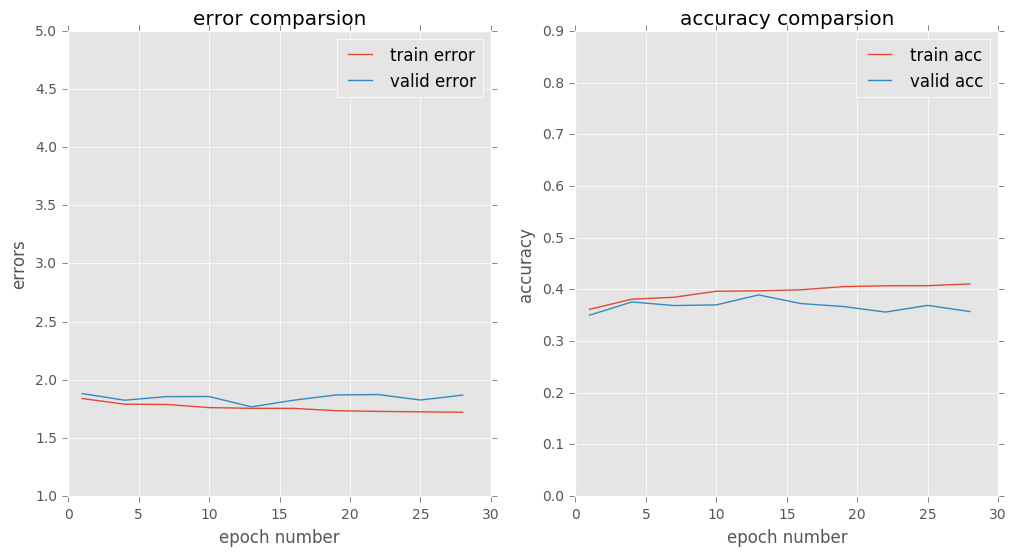

In [139]:
def graph(train_error, train_acc, vald_error, vald_acc):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.plot(np.arange(1,31,3),train_error, label='train error')
    ax1.plot(np.arange(1,31,3),vald_error, label='valid error')
    ax1.legend(loc='upper right')
    #ax1.set_yscale('log')
    ax1.set_xlabel('epoch number')
    ax1.set_ylabel('errors')
    ax1.set_ylim(1,5)
    ax1.set_title('error comparsion')
    ax2.plot(np.arange(1,31,3),train_acc, label='train acc')
    ax2.plot(np.arange(1,31,3),vald_acc, label='valid acc')
    ax2.legend(loc='upper right')
    #ax2.set_yscale('log')
    ax2.set_xlabel('epoch number')
    ax2.set_ylabel('accuracy')
    ax2.set_title('accuracy comparsion')
    ax2.set_yticks(np.arange(0,1,0.1))
_= graph(relu1_train_error,relu1_train_acc,relu1_vald_error,relu1_vald_acc)

Completed time-0.12s End of epoch 03: err(train)=1.68 acc(train)=0.40
                 err(valid)=1.79 acc(valid)=0.37
Completed time-0.12s End of epoch 06: err(train)=1.59 acc(train)=0.43
                 err(valid)=1.64 acc(valid)=0.41
Completed time-0.12s End of epoch 09: err(train)=1.54 acc(train)=0.45
                 err(valid)=1.63 acc(valid)=0.43
Completed time-0.13s End of epoch 12: err(train)=1.50 acc(train)=0.46
                 err(valid)=1.58 acc(valid)=0.44
Completed time-0.12s End of epoch 15: err(train)=1.47 acc(train)=0.48
                 err(valid)=1.55 acc(valid)=0.45
Completed time-0.12s End of epoch 18: err(train)=1.46 acc(train)=0.48
                 err(valid)=1.55 acc(valid)=0.46
Completed time-0.12s End of epoch 21: err(train)=1.44 acc(train)=0.49
                 err(valid)=1.52 acc(valid)=0.47
Completed time-0.12s End of epoch 24: err(train)=1.43 acc(train)=0.49
                 err(valid)=1.51 acc(valid)=0.47
Completed time-0.16s End of epoch 27: err(train)

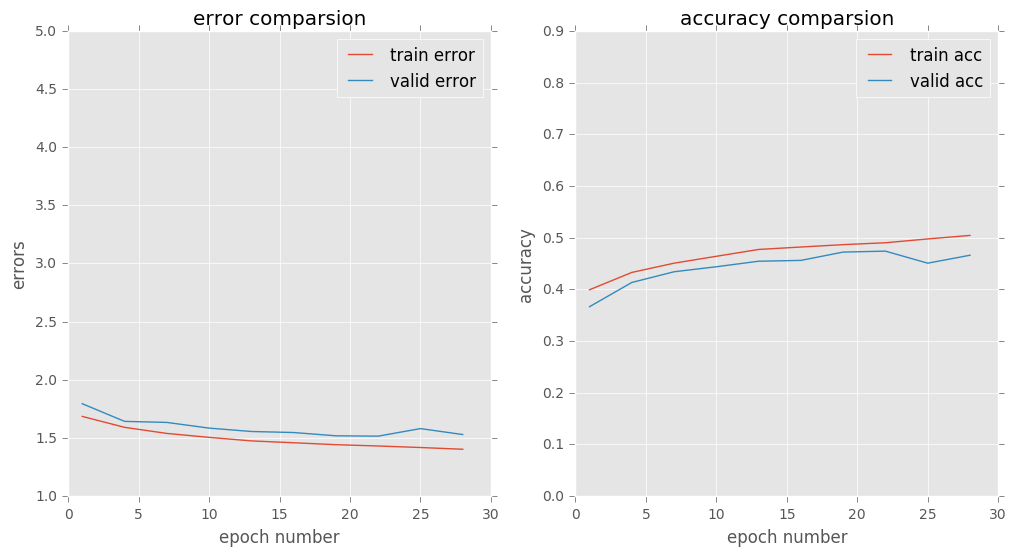

In [140]:
# 2layers system with Relu
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_relu(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_relu(hidden_1, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))
with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)    
init = tf.global_variables_initializer()
relu2_train_error, relu2_train_acc,relu2_vald_error,relu2_vald_acc = error_acc()
_=graph(relu2_train_error, relu2_train_acc,relu2_vald_error,relu2_vald_acc)

In [142]:
# 3 layers system with Relu
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_relu(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_relu(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_relu(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
init = tf.global_variables_initializer()
relu3_train_error, relu3_train_acc,relu3_vald_error,relu3_vald_acc = error_acc()

Completed time-0.13s End of epoch 03: err(train)=1.62 acc(train)=0.42
                 err(valid)=1.63 acc(valid)=0.41
Completed time-0.14s End of epoch 06: err(train)=1.51 acc(train)=0.46
                 err(valid)=1.57 acc(valid)=0.45
Completed time-0.18s End of epoch 09: err(train)=1.45 acc(train)=0.49
                 err(valid)=1.58 acc(valid)=0.44
Completed time-0.18s End of epoch 12: err(train)=1.40 acc(train)=0.50
                 err(valid)=1.48 acc(valid)=0.48
Completed time-0.12s End of epoch 15: err(train)=1.36 acc(train)=0.51
                 err(valid)=1.47 acc(valid)=0.48
Completed time-0.12s End of epoch 18: err(train)=1.33 acc(train)=0.53
                 err(valid)=1.52 acc(valid)=0.46
Completed time-0.12s End of epoch 21: err(train)=1.30 acc(train)=0.54
                 err(valid)=1.48 acc(valid)=0.49
Completed time-0.12s End of epoch 24: err(train)=1.28 acc(train)=0.55
                 err(valid)=1.49 acc(valid)=0.48
Completed time-0.12s End of epoch 27: err(train)

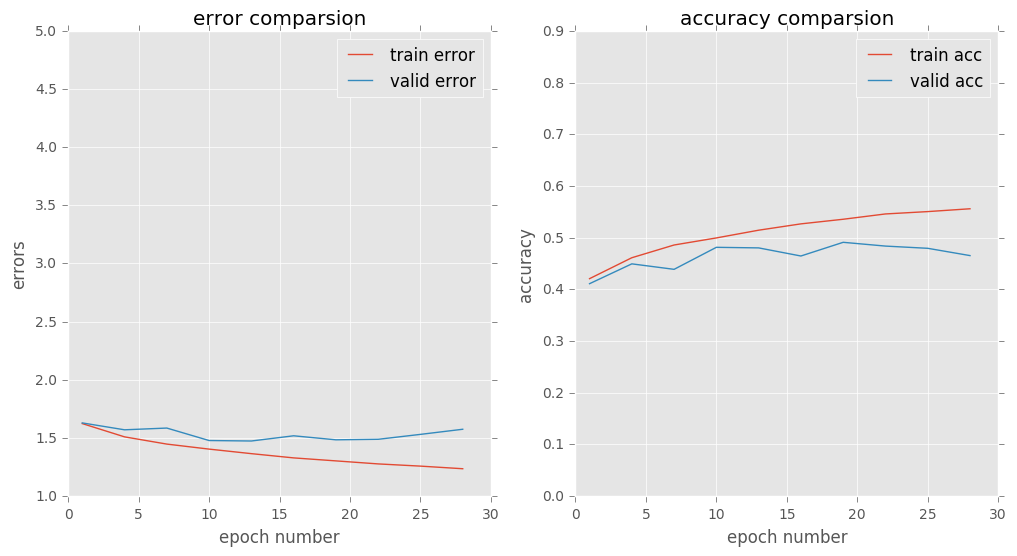

In [143]:
_=graph(relu3_train_error, relu3_train_acc,relu3_vald_error,relu3_vald_acc)

Completed time-0.12s End of epoch 03: err(train)=1.61 acc(train)=0.42
                 err(valid)=1.61 acc(valid)=0.42
Completed time-0.12s End of epoch 06: err(train)=1.50 acc(train)=0.47
                 err(valid)=1.55 acc(valid)=0.45
Completed time-0.12s End of epoch 09: err(train)=1.42 acc(train)=0.49
                 err(valid)=1.50 acc(valid)=0.47
Completed time-0.12s End of epoch 12: err(train)=1.35 acc(train)=0.52
                 err(valid)=1.57 acc(valid)=0.45
Completed time-0.12s End of epoch 15: err(train)=1.29 acc(train)=0.54
                 err(valid)=1.56 acc(valid)=0.46
Completed time-0.12s End of epoch 18: err(train)=1.23 acc(train)=0.56
                 err(valid)=1.52 acc(valid)=0.48
Completed time-0.12s End of epoch 21: err(train)=1.18 acc(train)=0.58
                 err(valid)=1.53 acc(valid)=0.48
Completed time-0.12s End of epoch 24: err(train)=1.13 acc(train)=0.59
                 err(valid)=1.55 acc(valid)=0.49
Completed time-0.13s End of epoch 27: err(train)

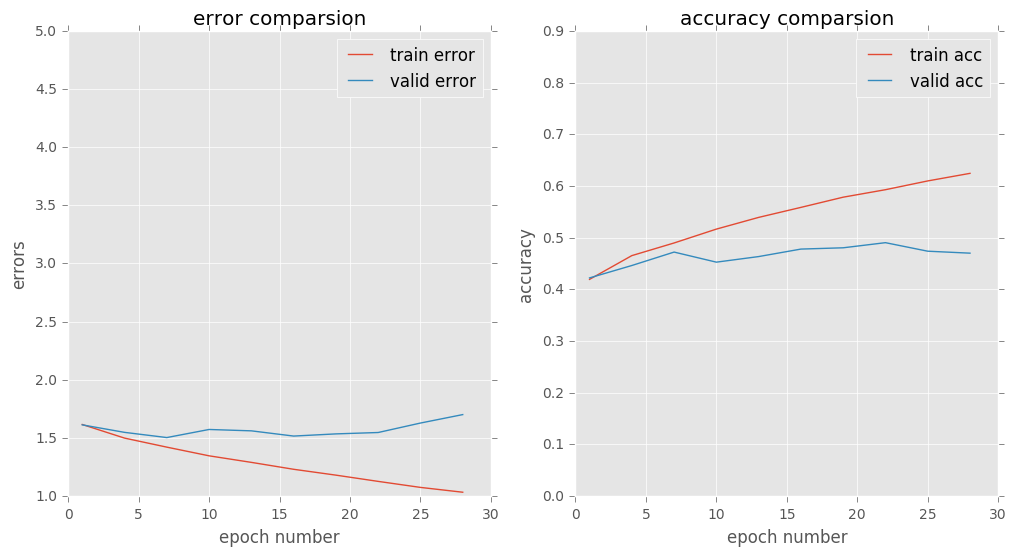

In [144]:
# 4layers system with Relu
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_relu(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_relu(hidden_1, num_hidden, num_hidden)
with tf.name_scope('fc-layer-3'):
    hidden_3 = fully_connected_layer_relu(hidden_2, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_relu(hidden_3, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), tf.float32))
with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
init = tf.global_variables_initializer()
relu4_train_error, relu4_train_acc,relu4_vald_error,relu4_vald_acc = error_acc()
_=graph(relu4_train_error, relu4_train_acc,relu4_vald_error,relu4_vald_acc)

In [233]:
def total_train_graph(train1_error,train2_error,train3_error,train4_error, train1_acc,train2_acc,train3_acc,train4_acc):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(12, 6))
    ax3 = fig.add_subplot(1, 2, 1)
    ax4 = fig.add_subplot(1, 2, 2)
    ax3.plot(np.arange(1,31,3),train1_error, label='1relu')
    ax3.plot(np.arange(1,31,3),train2_error, label='2relu')
    ax3.plot(np.arange(1,31,3),train3_error, label='3relu')
    ax3.plot(np.arange(1,31,3),train4_error, label='4relu')
    ax3.legend(loc='lower left')
    ax3.set_xlabel('epoch number')
    ax3.set_ylabel('train error')
    ax3.set_title('train error comparsion')

    ax4.plot(np.arange(1,31,3),train1_acc, label='1relu')
    ax4.plot(np.arange(1,31,3),train2_acc, label='2relu')
    ax4.plot(np.arange(1,31,3),train3_acc, label='3relu')
    ax4.plot(np.arange(1,31,3),train4_acc, label='4relu')
    ax4.legend(loc='upper left')
    ax4.set_xlabel('epoch number')
    ax4.set_ylabel('train acc')
    ax4.set_title('train acc comparsion')

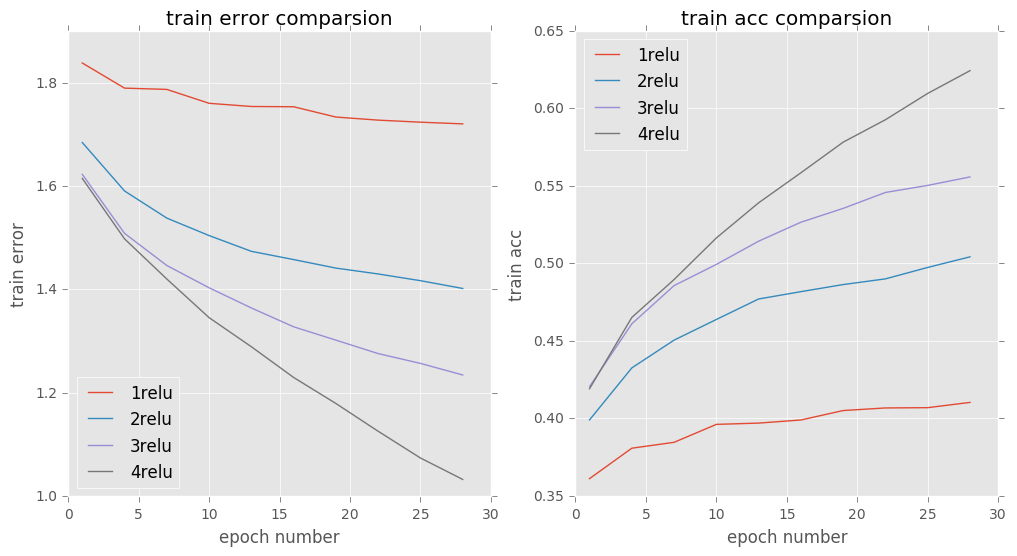

In [234]:
_=total_train_graph(relu1_train_error,relu2_train_error,relu3_train_error,relu4_train_error,
                    relu1_train_acc,relu2_train_acc,relu3_train_acc,relu4_train_acc)

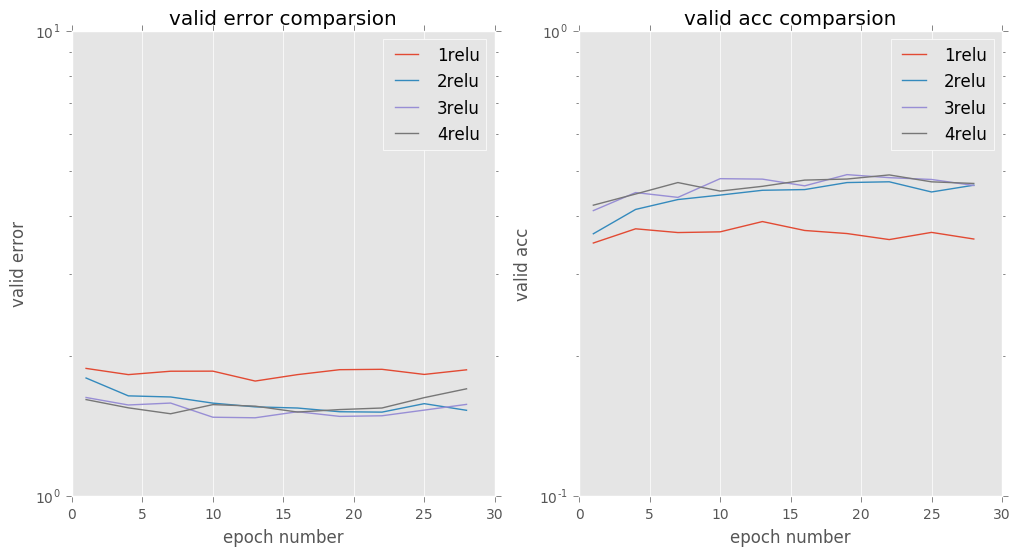

In [157]:
def total_valid_graph(vald1_error,vald2_error,vald3_error,vald4_error, vald1_acc,vald2_acc,vald3_acc,vald4_acc):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(12, 6))
    ax3 = fig.add_subplot(1, 2, 1)
    ax4 = fig.add_subplot(1, 2, 2)
    ax3.plot(np.arange(1,31,3),vald1_error, label='1relu')
    ax3.plot(np.arange(1,31,3),vald2_error, label='2relu')
    ax3.plot(np.arange(1,31,3),vald3_error, label='3relu')
    ax3.plot(np.arange(1,31,3),vald4_error, label='4relu')
    ax3.legend(loc='upper right')
    ax3.set_xlabel('epoch number')
    ax3.set_ylabel('valid error')
    ax3.set_title('valid error comparsion')
    ax3.set_yscale('log')
    ax4.plot(np.arange(1,31,3),vald1_acc, label='1relu')
    ax4.plot(np.arange(1,31,3),vald2_acc, label='2relu')
    ax4.plot(np.arange(1,31,3),vald3_acc, label='3relu')
    ax4.plot(np.arange(1,31,3),vald4_acc, label='4relu')
    ax4.legend(loc='upper right')
    ax4.set_xlabel('epoch number')
    ax4.set_ylabel('valid acc')
    ax4.set_yscale('log')
    ax4.set_title('valid acc comparsion')
_=total_valid_graph(relu1_vald_error,relu2_vald_error,relu3_vald_error,relu4_vald_error,
                    relu1_vald_acc,relu2_vald_acc,relu3_vald_acc,relu4_vald_acc)

# Different hidden nodes

Completed time-0.13s End of epoch 03: err(train)=1.63 acc(train)=0.42
                 err(valid)=1.59 acc(valid)=0.44
Completed time-0.13s End of epoch 06: err(train)=1.51 acc(train)=0.46
                 err(valid)=1.59 acc(valid)=0.45
Completed time-0.13s End of epoch 09: err(train)=1.44 acc(train)=0.49
                 err(valid)=1.49 acc(valid)=0.48
Completed time-0.13s End of epoch 12: err(train)=1.39 acc(train)=0.50
                 err(valid)=1.53 acc(valid)=0.47
Completed time-0.13s End of epoch 15: err(train)=1.35 acc(train)=0.52
                 err(valid)=1.49 acc(valid)=0.48
Completed time-0.13s End of epoch 18: err(train)=1.31 acc(train)=0.53
                 err(valid)=1.55 acc(valid)=0.46
Completed time-0.13s End of epoch 21: err(train)=1.28 acc(train)=0.54
                 err(valid)=1.50 acc(valid)=0.48
Completed time-0.13s End of epoch 24: err(train)=1.25 acc(train)=0.55
                 err(valid)=1.50 acc(valid)=0.48
Completed time-0.13s End of epoch 27: err(train)

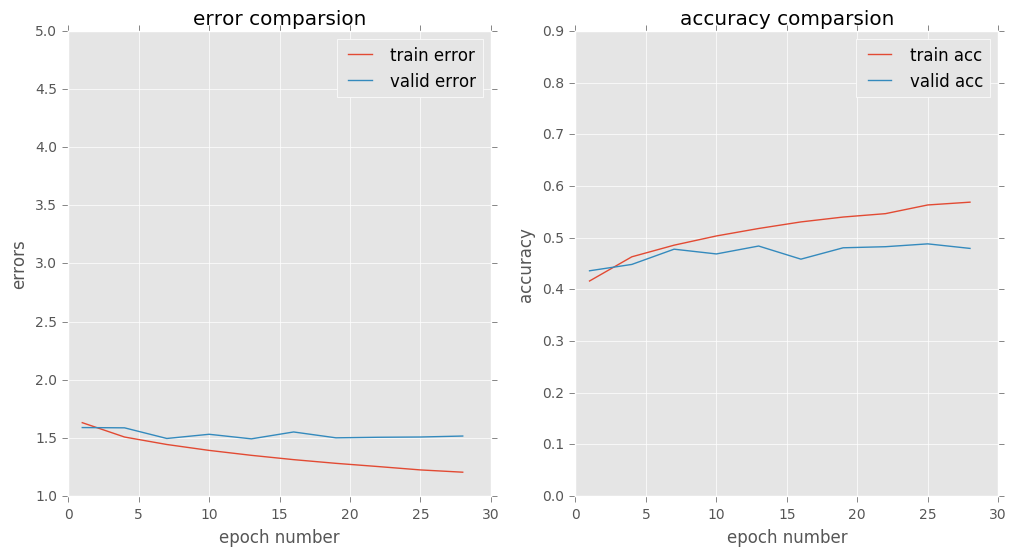

In [148]:
# I figured out 3 layers system is the best, now i start to find out how many hidden nodes is more suitable
num_hidden = 300
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_relu(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_relu(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_relu(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
init = tf.global_variables_initializer()
relu3_300_train_error, relu3_300_train_acc,relu3_300_vald_error,relu3_300_vald_acc = error_acc()
_=graph(relu3_300_train_error, relu3_300_train_acc,relu3_300_vald_error,relu3_300_vald_acc)

In [ ]:
# num_hidden = 400
# with tf.name_scope('fc-layer-1'):
#     hidden_1 = fully_connected_layer_relu(inputs, train_data.inputs.shape[1], num_hidden)
# with tf.name_scope('fc-layer-2'):
#     hidden_2 = fully_connected_layer_relu(hidden_1, num_hidden, num_hidden)
# with tf.name_scope('output-layer'):
#     outputs = fully_connected_layer_relu(hidden_2, num_hidden, train_data.num_classes, tf.identity)

# with tf.name_scope('error'):
#     error = tf.reduce_mean(
#         tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
# with tf.name_scope('accuracy'):
#     accuracy = tf.reduce_mean(tf.cast(
#             tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
#             tf.float32))

# with tf.name_scope('train'):
#     train_step = tf.train.AdamOptimizer().minimize(error)
# init = tf.global_variables_initializer()
# relu3_400_train_error, relu3_400_train_acc,relu3_400_vald_error,relu3_400_vald_acc = error_acc()
# _=graph(relu3_400_train_error, relu3_400_train_acc,relu3_400_vald_error,relu3_400_vald_acc)

In [ ]:
# num_hidden = 500
# with tf.name_scope('fc-layer-1'):
#     hidden_1 = fully_connected_layer_relu(inputs, train_data.inputs.shape[1], num_hidden)
# with tf.name_scope('fc-layer-2'):
#     hidden_2 = fully_connected_layer_relu(hidden_1, num_hidden, num_hidden)
# with tf.name_scope('output-layer'):
#     outputs = fully_connected_layer_relu(hidden_2, num_hidden, train_data.num_classes, tf.identity)

# with tf.name_scope('error'):
#     error = tf.reduce_mean(
#         tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
# with tf.name_scope('accuracy'):
#     accuracy = tf.reduce_mean(tf.cast(
#             tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
#             tf.float32))

# with tf.name_scope('train'):
#     train_step = tf.train.AdamOptimizer().minimize(error)
# init = tf.global_variables_initializer()
# relu3_500_train_error, relu3_500_train_acc,relu3_500_vald_error,relu3_500_vald_acc = error_acc()
# _=graph(relu3_500_train_error, relu3_500_train_acc,relu3_500_vald_error,relu3_500_vald_acc)

Completed time-0.12s End of epoch 03: err(train)=1.66 acc(train)=0.41
                 err(valid)=1.65 acc(valid)=0.41
Completed time-0.12s End of epoch 06: err(train)=1.55 acc(train)=0.44
                 err(valid)=1.57 acc(valid)=0.44
Completed time-0.12s End of epoch 09: err(train)=1.49 acc(train)=0.47
                 err(valid)=1.53 acc(valid)=0.46
Completed time-0.14s End of epoch 12: err(train)=1.46 acc(train)=0.48
                 err(valid)=1.55 acc(valid)=0.45
Completed time-0.12s End of epoch 15: err(train)=1.43 acc(train)=0.49
                 err(valid)=1.53 acc(valid)=0.46
Completed time-0.15s End of epoch 18: err(train)=1.40 acc(train)=0.50
                 err(valid)=1.50 acc(valid)=0.47
Completed time-0.18s End of epoch 21: err(train)=1.38 acc(train)=0.51
                 err(valid)=1.51 acc(valid)=0.47
Completed time-0.15s End of epoch 24: err(train)=1.36 acc(train)=0.51
                 err(valid)=1.47 acc(valid)=0.48
Completed time-0.13s End of epoch 27: err(train)

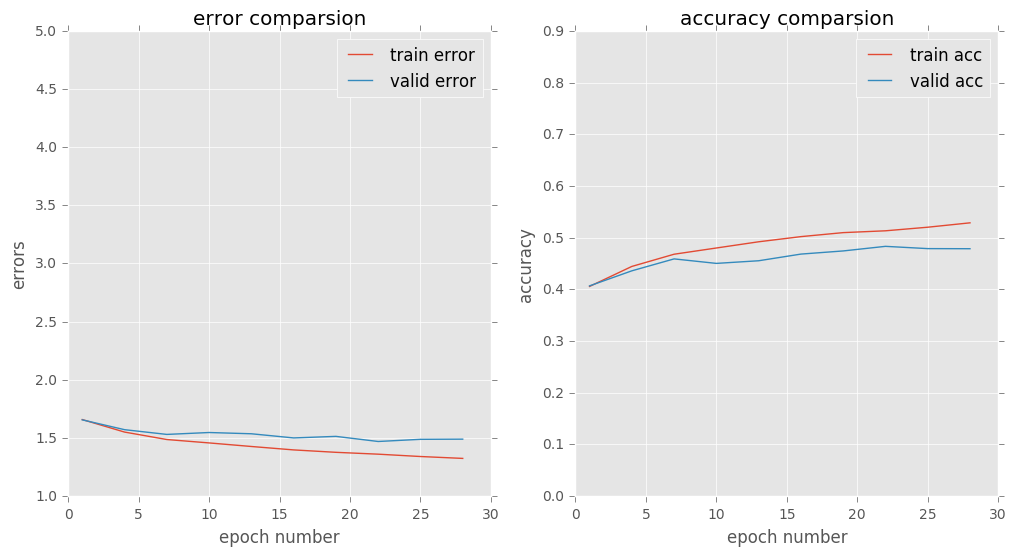

In [149]:
num_hidden = 100
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_relu(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_relu(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_relu(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
init = tf.global_variables_initializer()
relu3_100_train_error, relu3_100_train_acc,relu3_100_vald_error,relu3_100_vald_acc = error_acc()
_=graph(relu3_100_train_error, relu3_100_train_acc,relu3_100_vald_error,relu3_100_vald_acc)

Completed time-0.13s End of epoch 03: err(train)=1.73 acc(train)=0.38
                 err(valid)=1.73 acc(valid)=0.38
Completed time-0.12s End of epoch 06: err(train)=1.64 acc(train)=0.41
                 err(valid)=1.66 acc(valid)=0.41
Completed time-0.14s End of epoch 09: err(train)=1.61 acc(train)=0.43
                 err(valid)=1.68 acc(valid)=0.40
Completed time-0.13s End of epoch 12: err(train)=1.58 acc(train)=0.43
                 err(valid)=1.62 acc(valid)=0.42
Completed time-0.15s End of epoch 15: err(train)=1.56 acc(train)=0.44
                 err(valid)=1.63 acc(valid)=0.42
Completed time-0.13s End of epoch 18: err(train)=1.55 acc(train)=0.45
                 err(valid)=1.60 acc(valid)=0.43
Completed time-0.12s End of epoch 21: err(train)=1.53 acc(train)=0.45
                 err(valid)=1.61 acc(valid)=0.42
Completed time-0.17s End of epoch 24: err(train)=1.52 acc(train)=0.46
                 err(valid)=1.59 acc(valid)=0.43
Completed time-0.13s End of epoch 27: err(train)

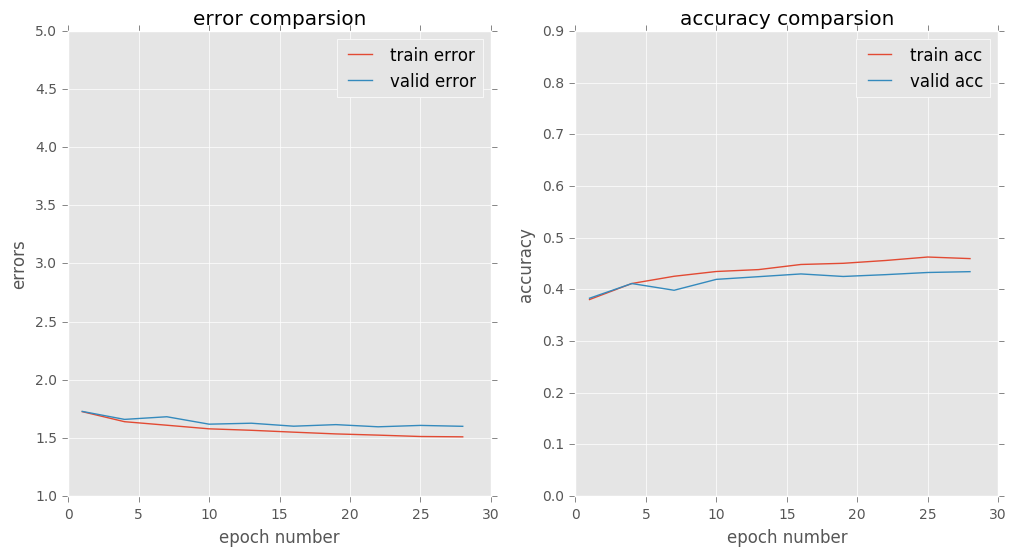

In [150]:
num_hidden = 50
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_relu(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_relu(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_relu(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))

with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
init = tf.global_variables_initializer()
relu3_50_train_error, relu3_50_train_acc,relu3_50_vald_error,relu3_50_vald_acc = error_acc()
_=graph(relu3_50_train_error, relu3_50_train_acc,relu3_50_vald_error,relu3_50_vald_acc)

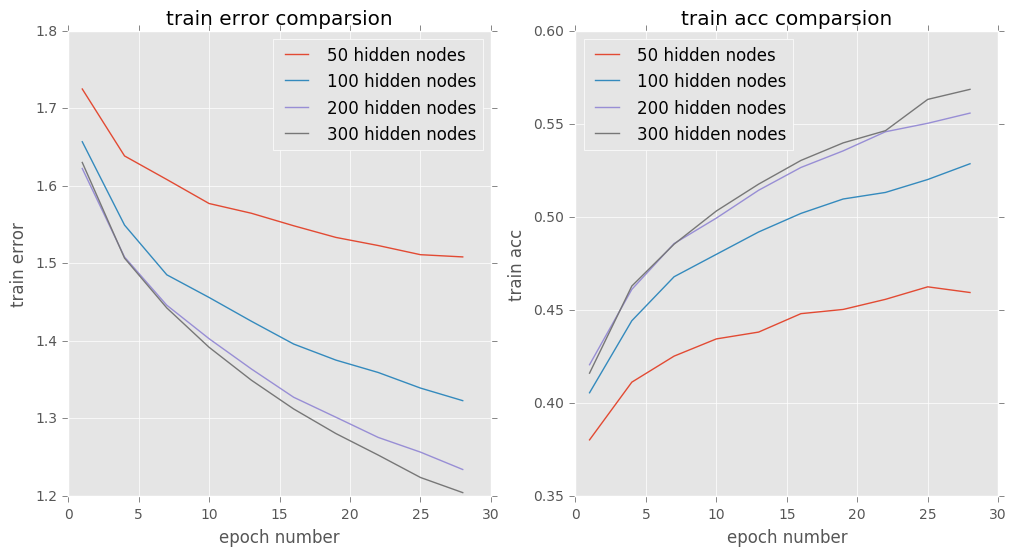

In [235]:
#total train error and acc comparsion with different hidden nodes
plt.style.use('ggplot')
fig = plt.figure(figsize=(12, 6))
ax3 = fig.add_subplot(1, 2, 1)
ax4 = fig.add_subplot(1, 2, 2)
ax3.plot(np.arange(1,31,3),relu3_50_train_error, label='50 hidden nodes')
ax3.plot(np.arange(1,31,3),relu3_100_train_error, label='100 hidden nodes')
ax3.plot(np.arange(1,31,3),relu3_train_error, label='200 hidden nodes')
ax3.plot(np.arange(1,31,3),relu3_300_train_error, label='300 hidden nodes')
ax3.legend(loc='upper right')
ax3.set_xlabel('epoch number')
ax3.set_ylabel('train error')
ax3.set_title('train error comparsion')

ax4.plot(np.arange(1,31,3),relu3_50_train_acc, label='50 hidden nodes')
ax4.plot(np.arange(1,31,3),relu3_100_train_acc, label='100 hidden nodes')
ax4.plot(np.arange(1,31,3),relu3_train_acc, label='200 hidden nodes')
ax4.plot(np.arange(1,31,3),relu3_300_train_acc, label='300 hidden nodes')
ax4.legend(loc='upper left')
ax4.set_xlabel('epoch number')
ax4.set_ylabel('train acc')
ax4.set_title('train acc comparsion')

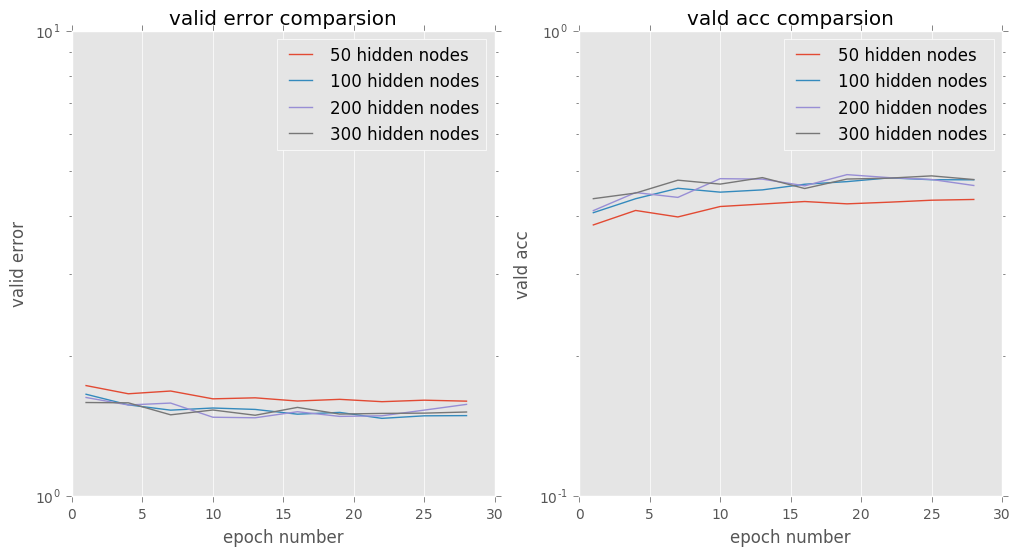

In [159]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12, 6))
ax3 = fig.add_subplot(1, 2, 1)
ax4 = fig.add_subplot(1, 2, 2)
ax3.plot(np.arange(1,31,3),relu3_50_vald_error, label='50 hidden nodes')
ax3.plot(np.arange(1,31,3),relu3_100_vald_error, label='100 hidden nodes')
ax3.plot(np.arange(1,31,3),relu3_vald_error, label='200 hidden nodes')
ax3.plot(np.arange(1,31,3),relu3_300_vald_error, label='300 hidden nodes')
ax3.legend(loc='upper right')
ax3.set_xlabel('epoch number')
ax3.set_ylabel('valid error')
ax3.set_title('valid error comparsion')
ax3.set_yscale('log')
ax4.plot(np.arange(1,31,3),relu3_50_vald_acc, label='50 hidden nodes')
ax4.plot(np.arange(1,31,3),relu3_100_vald_acc, label='100 hidden nodes')
ax4.plot(np.arange(1,31,3),relu3_vald_acc, label='200 hidden nodes')
ax4.plot(np.arange(1,31,3),relu3_300_vald_acc, label='300 hidden nodes')
ax4.legend(loc='upper right')
ax4.set_xlabel('epoch number')
ax4.set_ylabel('vald acc')
ax4.set_title('vald acc comparsion')
ax4.set_yscale('log')

# Different nonlinearities

In [153]:
# so far, the best model I found was 3 relu with 200 hidden nodes. 
# now I am trying to figure out how activation function will affect the model.  


# # i found that model converges quickly, and 18 epoch might be the best
# def error_acc_18epoch():
#     list_train_error=[]
#     list_train_acc=[]
#     list_vald_error=[]
#     list_vald_acc=[]
#     with tf.Session() as sess:
#         sess.run(init)
#         for e in range(18):
#             running_error = 0.
#             running_accuracy = 0.
#             for input_batch, target_batch in train_data:
#                 start_time= time.time()
#                 _, batch_error, batch_acc = sess.run(
#                     [train_step, error, accuracy], 
#                     feed_dict={inputs: input_batch, targets: target_batch})
#                 running_error += batch_error
#                 running_accuracy += batch_acc
#             running_error /= train_data.num_batches
#             running_accuracy /= train_data.num_batches
#             list_train_error.append(running_error)
#             list_train_acc.append(running_accuracy)
#             end_time= start_time - time.time()
#             print('Completed time{0:.2f}s End of epoch {1:02d}: err(train)={2:.2f} acc(train)={3:.2f}'
#                   .format(end_time, e + 1, running_error, running_accuracy))
#             if (e + 1) % 1 == 0:
#                 valid_error = 0.
#                 valid_accuracy = 0.
#                 for input_batch, target_batch in valid_data:
#                     batch_error, batch_acc = sess.run(
#                         [error, accuracy], 
#                         feed_dict={inputs: input_batch, targets: target_batch})
#                     valid_error += batch_error
#                     valid_accuracy += batch_acc
#                 valid_error /= valid_data.num_batches
#                 valid_accuracy /= valid_data.num_batches
#                 list_vald_error.append(valid_error)
#                 list_vald_acc.append(valid_accuracy)

#                 print('                 err(valid)={0:.2f} acc(valid)={1:.2f}'
#                        .format(valid_error, valid_accuracy))
#         return list_train_error,list_train_acc,list_vald_error,list_vald_acc

Completed time-0.14s End of epoch 03: err(train)=1.69 acc(train)=0.39
                 err(valid)=1.69 acc(valid)=0.39
Completed time-0.16s End of epoch 06: err(train)=1.59 acc(train)=0.43
                 err(valid)=1.61 acc(valid)=0.42
Completed time-0.14s End of epoch 09: err(train)=1.53 acc(train)=0.45
                 err(valid)=1.56 acc(valid)=0.45
Completed time-0.18s End of epoch 12: err(train)=1.49 acc(train)=0.47
                 err(valid)=1.55 acc(valid)=0.45
Completed time-0.14s End of epoch 15: err(train)=1.45 acc(train)=0.48
                 err(valid)=1.52 acc(valid)=0.46
Completed time-0.13s End of epoch 18: err(train)=1.42 acc(train)=0.49
                 err(valid)=1.57 acc(valid)=0.45
Completed time-0.13s End of epoch 21: err(train)=1.39 acc(train)=0.50
                 err(valid)=1.52 acc(valid)=0.46
Completed time-0.13s End of epoch 24: err(train)=1.36 acc(train)=0.51
                 err(valid)=1.49 acc(valid)=0.47
Completed time-0.13s End of epoch 27: err(train)

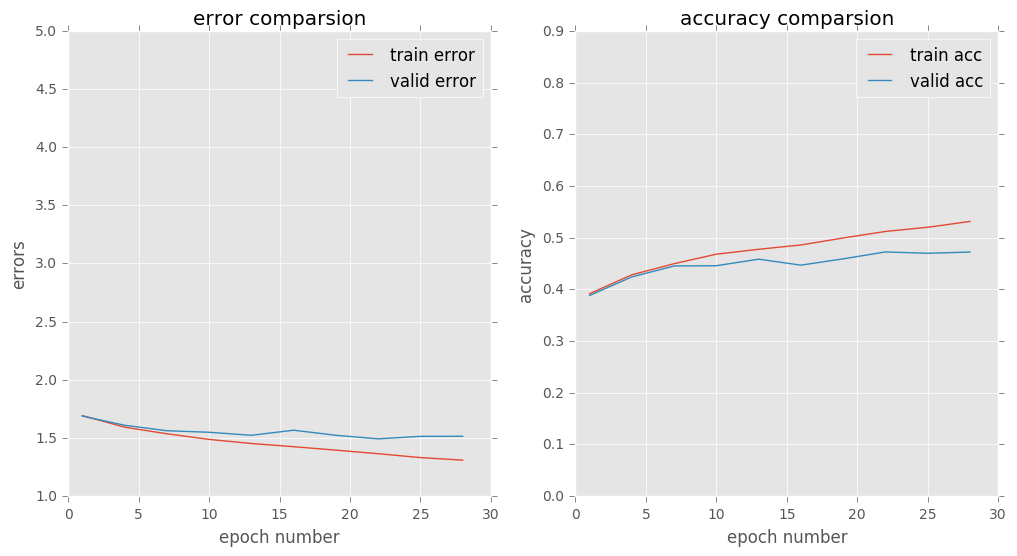

In [177]:
#sigmoid
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_sigmoid(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_sigmoid(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_sigmoid(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))
with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
init = tf.global_variables_initializer() 
sig3_train_error, sig3_train_acc,sig3_vald_error,sig3_vald_acc = error_acc()
_=graph(sig3_train_error, sig3_train_acc,sig3_vald_error,sig3_vald_acc)

Completed time-0.13s End of epoch 03: err(train)=1.64 acc(train)=0.41
                 err(valid)=1.60 acc(valid)=0.43
Completed time-0.13s End of epoch 06: err(train)=1.48 acc(train)=0.47
                 err(valid)=1.54 acc(valid)=0.45
Completed time-0.14s End of epoch 09: err(train)=1.39 acc(train)=0.50
                 err(valid)=1.50 acc(valid)=0.47
Completed time-0.20s End of epoch 12: err(train)=1.32 acc(train)=0.53
                 err(valid)=1.46 acc(valid)=0.49
Completed time-0.12s End of epoch 15: err(train)=1.25 acc(train)=0.55
                 err(valid)=1.46 acc(valid)=0.49
Completed time-0.12s End of epoch 18: err(train)=1.21 acc(train)=0.57
                 err(valid)=1.53 acc(valid)=0.48
Completed time-0.13s End of epoch 21: err(train)=1.15 acc(train)=0.59
                 err(valid)=1.47 acc(valid)=0.50
Completed time-0.12s End of epoch 24: err(train)=1.10 acc(train)=0.60
                 err(valid)=1.47 acc(valid)=0.51
Completed time-0.12s End of epoch 27: err(train)

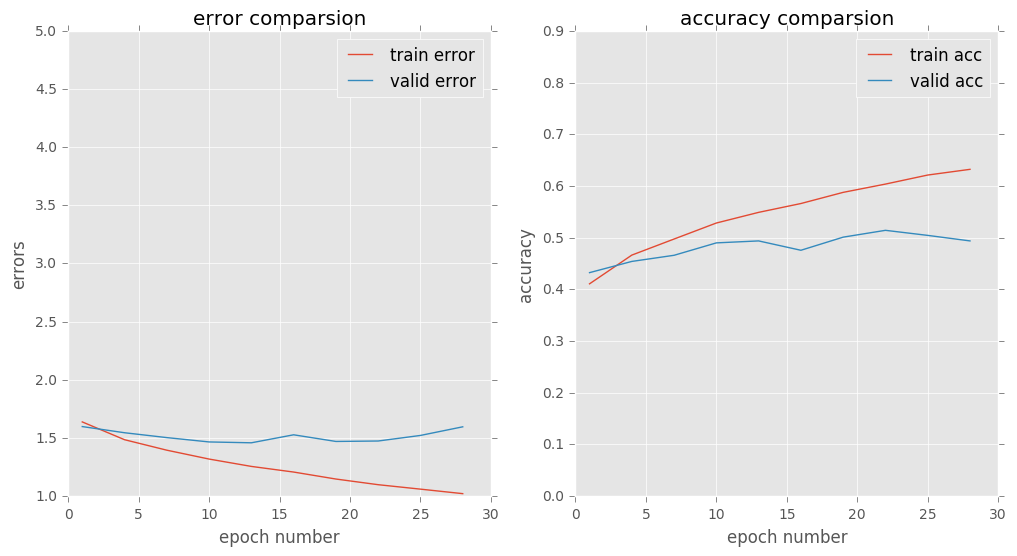

In [179]:
#elu
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_elu(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_elu(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_elu(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))
with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
init = tf.global_variables_initializer()
elu3_train_error, elu3_train_acc,elu3_vald_error,elu3_vald_acc = error_acc()
_=graph(elu3_train_error, elu3_train_acc,elu3_vald_error,elu3_vald_acc)

Completed time-0.14s End of epoch 03: err(train)=1.66 acc(train)=0.41
                 err(valid)=1.62 acc(valid)=0.42
Completed time-0.14s End of epoch 06: err(train)=1.56 acc(train)=0.44
                 err(valid)=1.57 acc(valid)=0.44
Completed time-0.13s End of epoch 09: err(train)=1.51 acc(train)=0.46
                 err(valid)=1.58 acc(valid)=0.44
Completed time-0.17s End of epoch 12: err(train)=1.46 acc(train)=0.48
                 err(valid)=1.53 acc(valid)=0.46
Completed time-0.18s End of epoch 15: err(train)=1.44 acc(train)=0.48
                 err(valid)=1.53 acc(valid)=0.45
Completed time-0.13s End of epoch 18: err(train)=1.42 acc(train)=0.49
                 err(valid)=1.52 acc(valid)=0.46
Completed time-0.13s End of epoch 21: err(train)=1.39 acc(train)=0.50
                 err(valid)=1.53 acc(valid)=0.46
Completed time-0.14s End of epoch 24: err(train)=1.37 acc(train)=0.51
                 err(valid)=1.57 acc(valid)=0.45
Completed time-0.14s End of epoch 27: err(train)

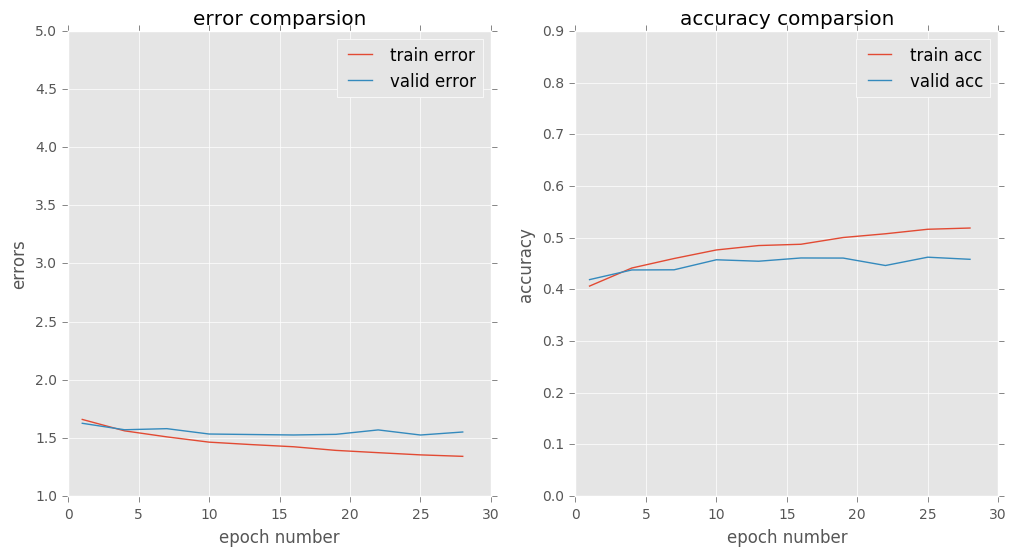

In [180]:
#relu6
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_relu6(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_relu6(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_relu6(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))
with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
init = tf.global_variables_initializer() 
relu6_3_train_error, relu6_3_train_acc,relu6_3_vald_error,relu6_3_vald_acc = error_acc()
_=graph(relu6_3_train_error, relu6_3_train_acc,relu6_3_vald_error,relu6_3_vald_acc)

Completed time-0.14s End of epoch 03: err(train)=1.59 acc(train)=0.43
                 err(valid)=1.58 acc(valid)=0.44
Completed time-0.16s End of epoch 06: err(train)=1.47 acc(train)=0.48
                 err(valid)=1.50 acc(valid)=0.47
Completed time-0.18s End of epoch 09: err(train)=1.38 acc(train)=0.51
                 err(valid)=1.49 acc(valid)=0.48
Completed time-0.13s End of epoch 12: err(train)=1.31 acc(train)=0.53
                 err(valid)=1.46 acc(valid)=0.49
Completed time-0.20s End of epoch 15: err(train)=1.25 acc(train)=0.55
                 err(valid)=1.47 acc(valid)=0.49
Completed time-0.15s End of epoch 18: err(train)=1.20 acc(train)=0.57
                 err(valid)=1.51 acc(valid)=0.49
Completed time-0.14s End of epoch 21: err(train)=1.15 acc(train)=0.59
                 err(valid)=1.48 acc(valid)=0.51
Completed time-0.16s End of epoch 24: err(train)=1.11 acc(train)=0.60
                 err(valid)=1.51 acc(valid)=0.50
Completed time-0.13s End of epoch 27: err(train)

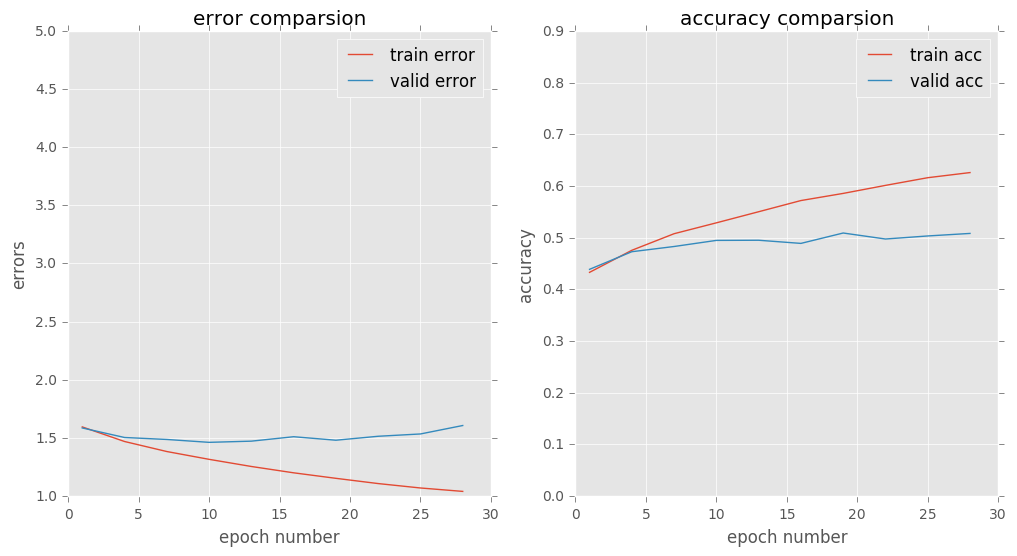

In [181]:
#softplus
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_softplus(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_softplus(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_softplus(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))
with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
init = tf.global_variables_initializer() 
softplus3_train_error, softplus3_train_acc,softplus3_vald_error,softplus3_vald_acc = error_acc()
_=graph(softplus3_train_error, softplus3_train_acc,softplus3_vald_error,softplus3_vald_acc)

Completed time-0.14s End of epoch 03: err(train)=1.84 acc(train)=0.33
                 err(valid)=1.79 acc(valid)=0.36
Completed time-0.16s End of epoch 06: err(train)=1.79 acc(train)=0.35
                 err(valid)=1.80 acc(valid)=0.36
Completed time-0.17s End of epoch 09: err(train)=1.74 acc(train)=0.38
                 err(valid)=1.73 acc(valid)=0.38
Completed time-0.15s End of epoch 12: err(train)=1.71 acc(train)=0.39
                 err(valid)=1.77 acc(valid)=0.37
Completed time-0.14s End of epoch 15: err(train)=1.69 acc(train)=0.39
                 err(valid)=1.76 acc(valid)=0.37
Completed time-0.14s End of epoch 18: err(train)=1.66 acc(train)=0.41
                 err(valid)=1.71 acc(valid)=0.39
Completed time-0.13s End of epoch 21: err(train)=1.64 acc(train)=0.41
                 err(valid)=1.76 acc(valid)=0.38
Completed time-0.13s End of epoch 24: err(train)=1.63 acc(train)=0.42
                 err(valid)=1.67 acc(valid)=0.42
Completed time-0.13s End of epoch 27: err(train)

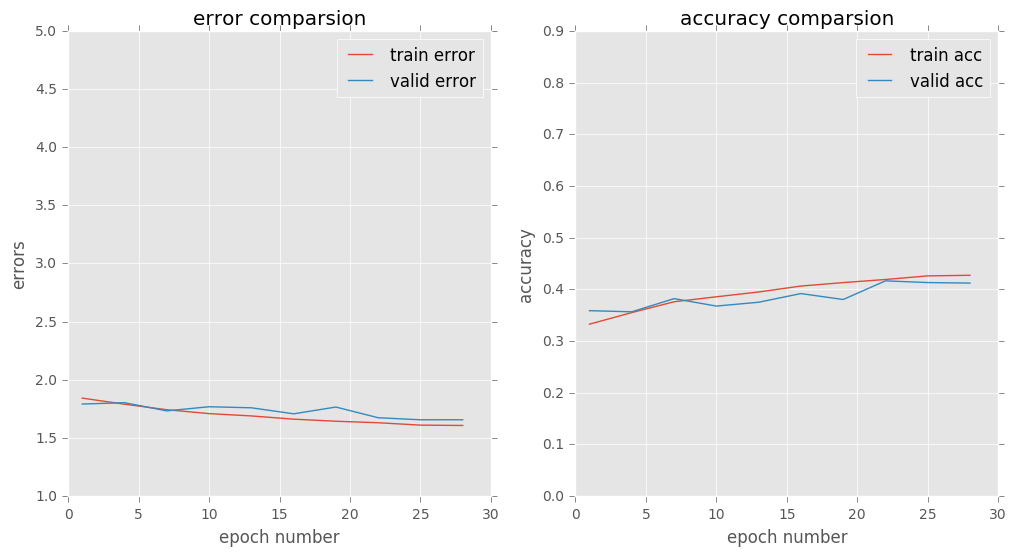

In [182]:
#tanh
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_tanh(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_tanh(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_tanh(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))
with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer().minimize(error)
init = tf.global_variables_initializer() 
tanh3_train_error, tanh3_train_acc,tanh3_vald_error,tanh3_vald_acc = error_acc()
_=graph(tanh3_train_error, tanh3_train_acc,tanh3_vald_error,tanh3_vald_acc)

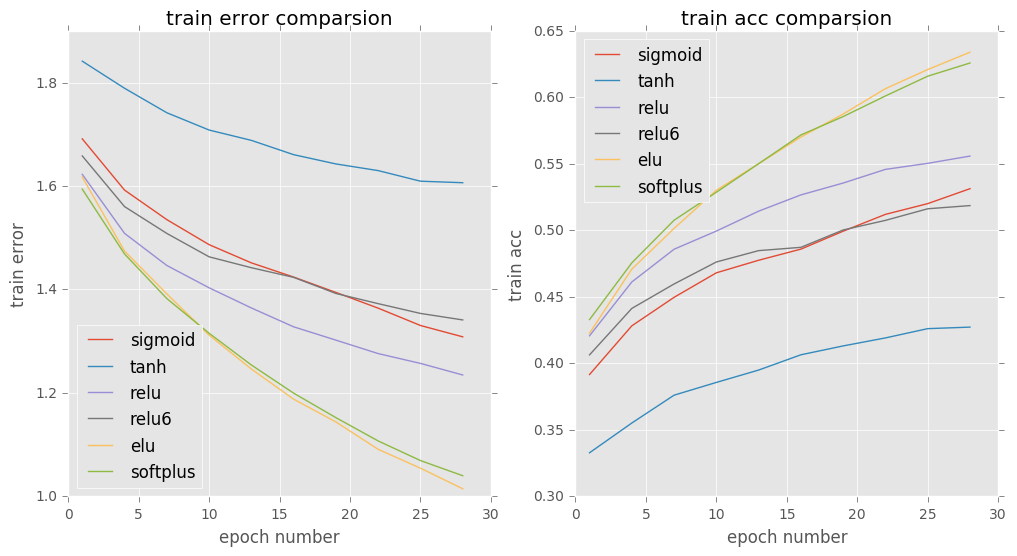

In [236]:
# 6 different activation functions comparsions.
plt.style.use('ggplot')
fig = plt.figure(figsize=(12, 6))
ax3 = fig.add_subplot(1, 2, 1)
ax4 = fig.add_subplot(1, 2, 2)
ax3.plot(np.arange(1,31,3),sig3_train_error, label='sigmoid')
ax3.plot(np.arange(1,31,3),tanh3_train_error, label='tanh')
ax3.plot(np.arange(1,31,3),relu3_train_error, label='relu')
ax3.plot(np.arange(1,31,3),relu6_3_train_error, label='relu6')
ax3.plot(np.arange(1,31,3),elu3_train_error, label='elu')
ax3.plot(np.arange(1,31,3),softplus3_train_error, label='softplus')
ax3.legend(loc='lower left')
ax3.set_xlabel('epoch number')
ax3.set_ylabel('train error')
ax3.set_title('train error comparsion')

ax4.plot(np.arange(1,31,3),sig3_train_acc, label='sigmoid')
ax4.plot(np.arange(1,31,3),tanh3_train_acc, label='tanh')
ax4.plot(np.arange(1,31,3),relu3_train_acc, label='relu')
ax4.plot(np.arange(1,31,3),relu6_3_train_acc, label='relu6')
ax4.plot(np.arange(1,31,3),elu3_train_acc, label='elu')
ax4.plot(np.arange(1,31,3),softplus3_train_acc, label='softplus')
ax4.legend(loc='upper left')
ax4.set_xlabel('epoch number')
ax4.set_ylabel('train acc')
ax4.set_title('train acc comparsion')

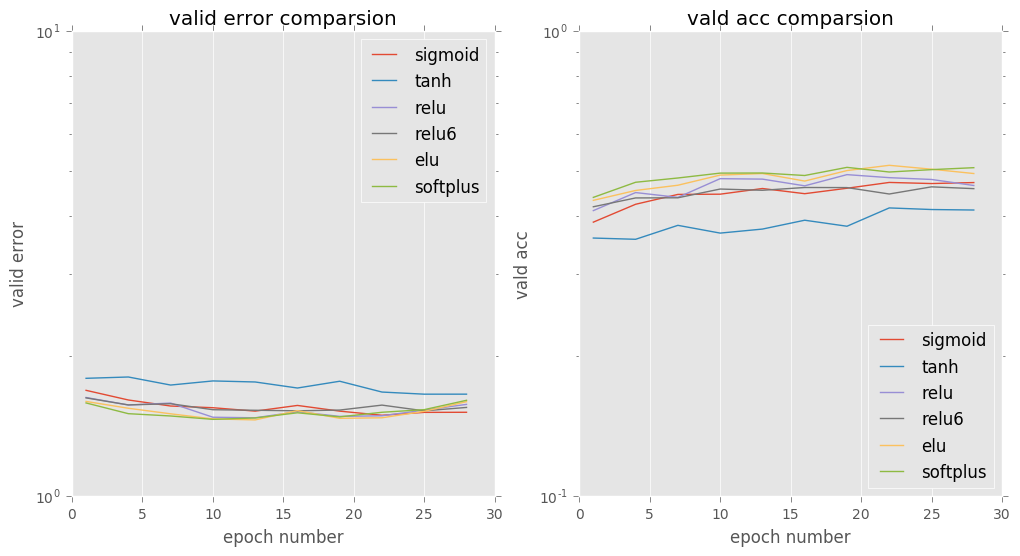

In [185]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12, 6))
ax3 = fig.add_subplot(1, 2, 1)
ax4 = fig.add_subplot(1, 2, 2)
ax3.plot(np.arange(1,31,3),sig3_vald_error, label='sigmoid')
ax3.plot(np.arange(1,31,3),tanh3_vald_error, label='tanh')
ax3.plot(np.arange(1,31,3),relu3_vald_error, label='relu')
ax3.plot(np.arange(1,31,3),relu6_3_vald_error, label='relu6')
ax3.plot(np.arange(1,31,3),elu3_vald_error, label='elu')
ax3.plot(np.arange(1,31,3),softplus3_vald_error, label='softplus')
ax3.legend(loc='upper right')
ax3.set_xlabel('epoch number')
ax3.set_ylabel('valid error')
ax3.set_title('valid error comparsion')
ax3.set_yscale('log')
ax4.plot(np.arange(1,31,3),sig3_vald_acc, label='sigmoid')
ax4.plot(np.arange(1,31,3),tanh3_vald_acc, label='tanh')
ax4.plot(np.arange(1,31,3),relu3_vald_acc, label='relu')
ax4.plot(np.arange(1,31,3),relu6_3_vald_acc, label='relu6')
ax4.plot(np.arange(1,31,3),elu3_vald_acc, label='elu')
ax4.plot(np.arange(1,31,3),softplus3_vald_acc, label='softplus')
ax4.legend(loc='lower right')
ax4.set_xlabel('epoch number')
ax4.set_ylabel('vald acc')
ax4.set_title('vald acc comparsion')
ax4.set_yscale('log')

 # Different Optimizer

Completed time-0.13s End of epoch 03: err(train)=1.62 acc(train)=0.42
                 err(valid)=1.68 acc(valid)=0.39
Completed time-0.12s End of epoch 06: err(train)=1.47 acc(train)=0.47
                 err(valid)=1.51 acc(valid)=0.46
Completed time-0.13s End of epoch 09: err(train)=1.39 acc(train)=0.50
                 err(valid)=1.46 acc(valid)=0.48
Completed time-0.12s End of epoch 12: err(train)=1.31 acc(train)=0.53
                 err(valid)=1.47 acc(valid)=0.49
Completed time-0.14s End of epoch 15: err(train)=1.25 acc(train)=0.55
                 err(valid)=1.46 acc(valid)=0.50
Completed time-0.12s End of epoch 18: err(train)=1.19 acc(train)=0.57
                 err(valid)=1.50 acc(valid)=0.49
Completed time-0.13s End of epoch 21: err(train)=1.14 acc(train)=0.59
                 err(valid)=1.48 acc(valid)=0.51
Completed time-0.13s End of epoch 24: err(train)=1.09 acc(train)=0.61
                 err(valid)=1.52 acc(valid)=0.50
Completed time-0.13s End of epoch 27: err(train)

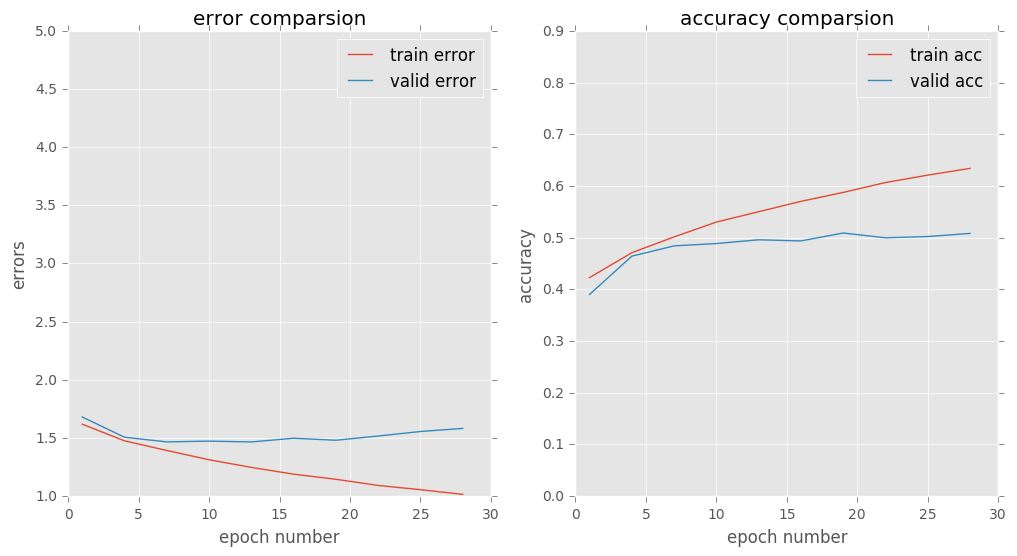

In [223]:
#elu with AdamOptimizer with fixed initilized learning rate =0.001
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_elu(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_elu(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_elu(hidden_2, num_hidden, train_data.num_classes, tf.identity)

with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))
with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(0.001).minimize(error)
init = tf.global_variables_initializer()
elu3_train_error, elu3_train_acc,elu3_vald_error,elu3_vald_acc = error_acc()
_=graph(elu3_train_error, elu3_train_acc,elu3_vald_error,elu3_vald_acc)

Completed time-0.19s End of epoch 03: err(train)=1.75 acc(train)=0.38
                 err(valid)=1.72 acc(valid)=0.38
Completed time-0.13s End of epoch 06: err(train)=1.58 acc(train)=0.44
                 err(valid)=1.60 acc(valid)=0.44
Completed time-0.13s End of epoch 09: err(train)=1.50 acc(train)=0.47
                 err(valid)=1.56 acc(valid)=0.46
Completed time-0.14s End of epoch 12: err(train)=1.44 acc(train)=0.49
                 err(valid)=1.55 acc(valid)=0.45
Completed time-0.15s End of epoch 15: err(train)=1.39 acc(train)=0.51
                 err(valid)=1.46 acc(valid)=0.49
Completed time-0.15s End of epoch 18: err(train)=1.34 acc(train)=0.53
                 err(valid)=1.44 acc(valid)=0.49
Completed time-0.16s End of epoch 21: err(train)=1.30 acc(train)=0.54
                 err(valid)=1.45 acc(valid)=0.49
Completed time-0.14s End of epoch 24: err(train)=1.27 acc(train)=0.56
                 err(valid)=1.39 acc(valid)=0.51
Completed time-0.14s End of epoch 27: err(train)

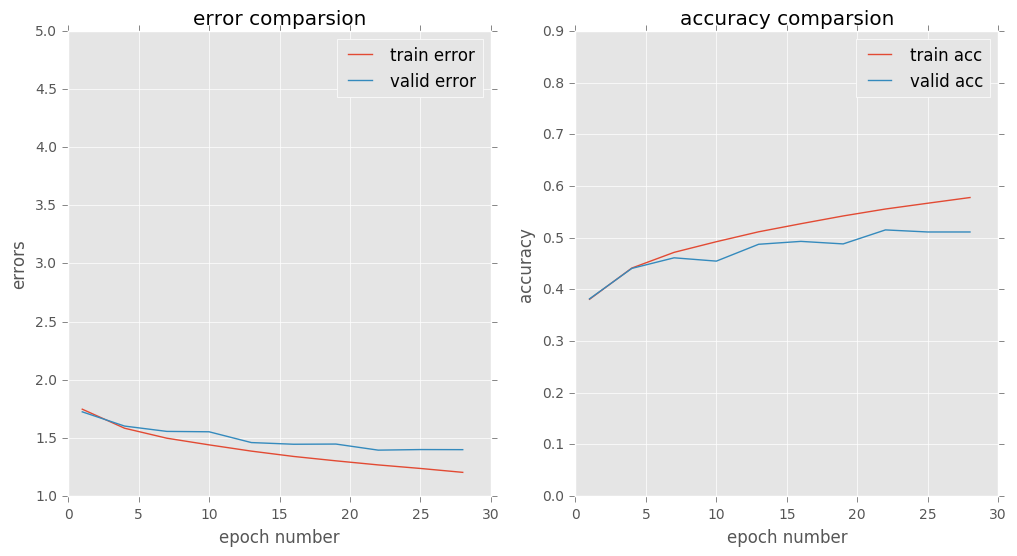

In [213]:
#elu with GDP with fixed initilized learning rate =0.01num_hidden = 200
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_elu(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_elu(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_elu(hidden_2, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(error)
init = tf.global_variables_initializer()
elu3_GDP_train_error, elu3_GDP_train_acc,elu3_GDP_vald_error,elu3_GDP_vald_acc = error_acc()
_=graph(elu3_GDP_train_error, elu3_GDP_train_acc,elu3_GDP_vald_error,elu3_GDP_vald_acc)

Completed time-0.14s End of epoch 03: err(train)=1.93 acc(train)=0.32
                 err(valid)=1.91 acc(valid)=0.32
Completed time-0.14s End of epoch 06: err(train)=1.84 acc(train)=0.36
                 err(valid)=1.84 acc(valid)=0.36
Completed time-0.14s End of epoch 09: err(train)=1.79 acc(train)=0.38
                 err(valid)=1.80 acc(valid)=0.37
Completed time-0.14s End of epoch 12: err(train)=1.76 acc(train)=0.39
                 err(valid)=1.78 acc(valid)=0.38
Completed time-0.16s End of epoch 15: err(train)=1.74 acc(train)=0.40
                 err(valid)=1.75 acc(valid)=0.39
Completed time-0.26s End of epoch 18: err(train)=1.72 acc(train)=0.41
                 err(valid)=1.74 acc(valid)=0.39
Completed time-0.15s End of epoch 21: err(train)=1.70 acc(train)=0.41
                 err(valid)=1.72 acc(valid)=0.40
Completed time-0.15s End of epoch 24: err(train)=1.68 acc(train)=0.42
                 err(valid)=1.70 acc(valid)=0.41
Completed time-0.15s End of epoch 27: err(train)

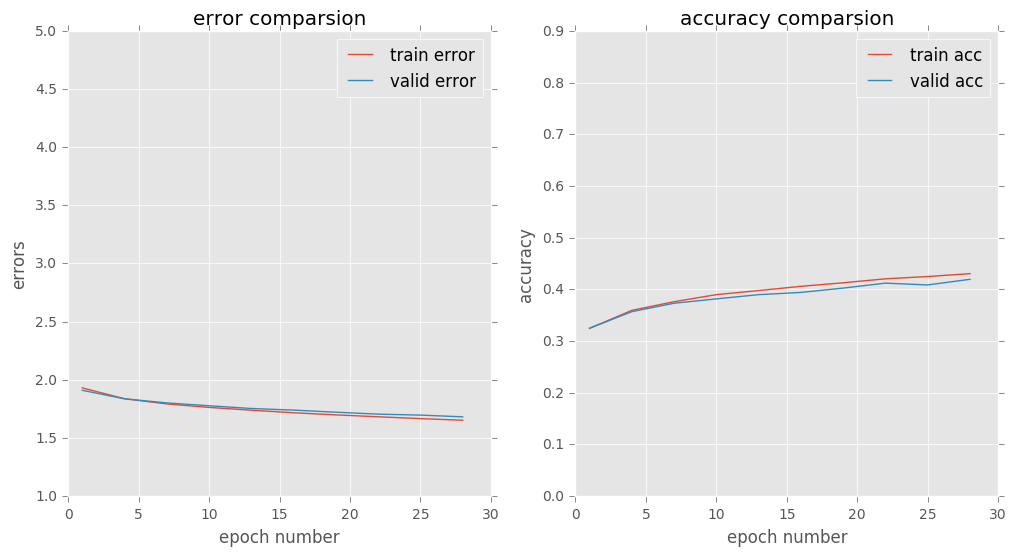

In [240]:
## elu with Adadelt Optimizer with fixed initilized learning rate =0.01num_hidden = 200
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_elu(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_elu(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_elu(hidden_2, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))
with tf.name_scope('train'):
    train_step = tf.train.AdadeltaOptimizer(learning_rate=0.01).minimize(error)
init = tf.global_variables_initializer()
elu3_ADD_train_error, elu3_ADD_train_acc,elu3_ADD_vald_error,elu3_ADD_vald_acc = error_acc()
_=graph(elu3_ADD_train_error, elu3_ADD_train_acc,elu3_ADD_vald_error,elu3_ADD_vald_acc)

Completed time-0.14s End of epoch 03: err(train)=1.63 acc(train)=0.42
                 err(valid)=1.61 acc(valid)=0.44
Completed time-0.15s End of epoch 06: err(train)=1.50 acc(train)=0.47
                 err(valid)=1.57 acc(valid)=0.45
Completed time-0.14s End of epoch 09: err(train)=1.43 acc(train)=0.50
                 err(valid)=1.51 acc(valid)=0.47
Completed time-0.13s End of epoch 12: err(train)=1.36 acc(train)=0.52
                 err(valid)=1.45 acc(valid)=0.49
Completed time-0.14s End of epoch 15: err(train)=1.32 acc(train)=0.53
                 err(valid)=1.43 acc(valid)=0.51
Completed time-0.14s End of epoch 18: err(train)=1.28 acc(train)=0.55
                 err(valid)=1.45 acc(valid)=0.50
Completed time-0.14s End of epoch 21: err(train)=1.24 acc(train)=0.57
                 err(valid)=1.39 acc(valid)=0.52
Completed time-0.13s End of epoch 24: err(train)=1.20 acc(train)=0.58
                 err(valid)=1.38 acc(valid)=0.52
Completed time-0.14s End of epoch 27: err(train)

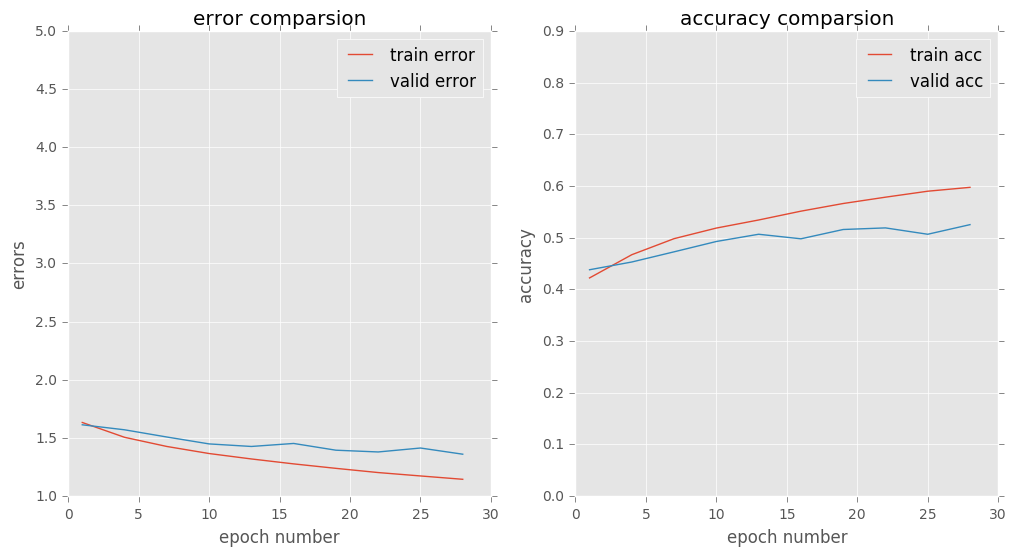

In [210]:
#elu with Adagrad Optimizer with fixed initilized learning rate =0.01num_hidden = 200
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_elu(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_elu(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_elu(hidden_2, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))
with tf.name_scope('train'):
    train_step = tf.train.AdagradOptimizer(learning_rate=0.01).minimize(error)
init = tf.global_variables_initializer()
elu3_Agrad_train_error, elu3_Agrad_train_acc,elu3_Agrad_vald_error,elu3_Agrad_vald_acc = error_acc()
_=graph(elu3_Agrad_train_error, elu3_Agrad_train_acc,elu3_Agrad_vald_error,elu3_Agrad_vald_acc)

Completed time-0.19s End of epoch 03: err(train)=1.58 acc(train)=0.43
                 err(valid)=1.55 acc(valid)=0.46
Completed time-0.14s End of epoch 06: err(train)=1.45 acc(train)=0.48
                 err(valid)=1.49 acc(valid)=0.47
Completed time-0.14s End of epoch 09: err(train)=1.35 acc(train)=0.51
                 err(valid)=1.48 acc(valid)=0.48
Completed time-0.16s End of epoch 12: err(train)=1.28 acc(train)=0.54
                 err(valid)=1.43 acc(valid)=0.50
Completed time-0.15s End of epoch 15: err(train)=1.20 acc(train)=0.57
                 err(valid)=1.45 acc(valid)=0.50
Completed time-0.15s End of epoch 18: err(train)=1.15 acc(train)=0.59
                 err(valid)=1.54 acc(valid)=0.49
Completed time-0.20s End of epoch 21: err(train)=1.10 acc(train)=0.60
                 err(valid)=1.49 acc(valid)=0.50
Completed time-0.14s End of epoch 24: err(train)=1.03 acc(train)=0.63
                 err(valid)=1.50 acc(valid)=0.52
Completed time-0.14s End of epoch 27: err(train)

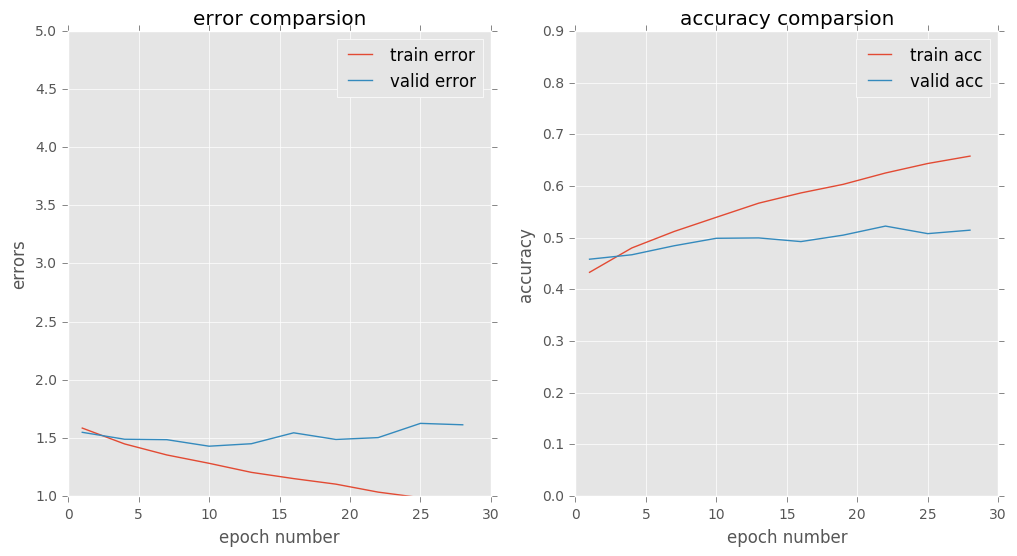

In [215]:
#elu with Momentum Optimizer with fixed initilized learning rate =0.01num_hidden = 200
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_elu(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_elu(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_elu(hidden_2, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))
with tf.name_scope('train'):
    train_step = tf.train.MomentumOptimizer(learning_rate=0.01,momentum=0.9).minimize(error)
init = tf.global_variables_initializer()
elu3_Mom_train_error, elu3_Mom_train_acc,elu3_Mom_vald_error,elu3_Mom_vald_acc = error_acc()
_=graph(elu3_Mom_train_error, elu3_Mom_train_acc,elu3_Mom_vald_error,elu3_Mom_vald_acc)

Completed time-0.17s End of epoch 03: err(train)=2.03 acc(train)=0.22
                 err(valid)=1.97 acc(valid)=0.25
Completed time-0.15s End of epoch 06: err(train)=1.85 acc(train)=0.32
                 err(valid)=1.84 acc(valid)=0.33
Completed time-0.15s End of epoch 09: err(train)=1.72 acc(train)=0.38
                 err(valid)=1.72 acc(valid)=0.38
Completed time-0.19s End of epoch 12: err(train)=1.65 acc(train)=0.41
                 err(valid)=1.65 acc(valid)=0.41
Completed time-0.14s End of epoch 15: err(train)=1.59 acc(train)=0.43
                 err(valid)=1.60 acc(valid)=0.43
Completed time-0.16s End of epoch 18: err(train)=1.54 acc(train)=0.45
                 err(valid)=1.58 acc(valid)=0.44
Completed time-0.15s End of epoch 21: err(train)=1.50 acc(train)=0.47
                 err(valid)=1.56 acc(valid)=0.44
Completed time-0.15s End of epoch 24: err(train)=1.46 acc(train)=0.48
                 err(valid)=1.50 acc(valid)=0.47
Completed time-0.15s End of epoch 27: err(train)

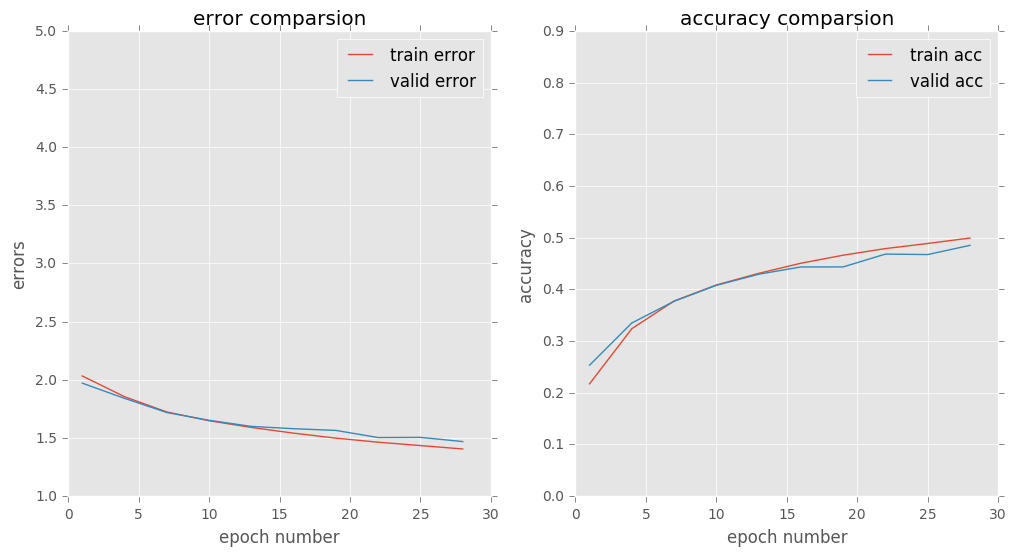

In [216]:
#elu with Ftr1 Optimizer with fixed initilized learning rate =0.01num_hidden = 200
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_elu(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_elu(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_elu(hidden_2, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))
with tf.name_scope('train'):
    train_step = tf.train.FtrlOptimizer(learning_rate=0.01).minimize(error)
init = tf.global_variables_initializer()
elu3_Ftr1_train_error, elu3_Ftr1_train_acc,elu3_Ftr1_vald_error,elu3_Ftr1_vald_acc = error_acc()
_=graph(elu3_Ftr1_train_error, elu3_Ftr1_train_acc,elu3_Ftr1_vald_error,elu3_Ftr1_vald_acc)

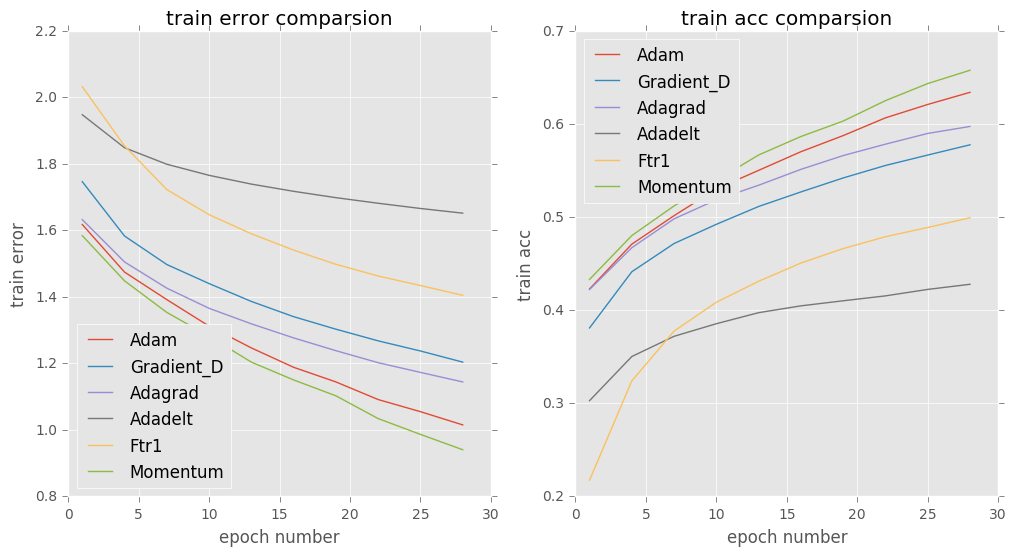

In [224]:
# 6 different Optimizers comparsions.
plt.style.use('ggplot')
fig = plt.figure(figsize=(12, 6))
ax3 = fig.add_subplot(1, 2, 1)
ax4 = fig.add_subplot(1, 2, 2)
ax3.plot(np.arange(1,31,3),elu3_train_error, label='Adam')
ax3.plot(np.arange(1,31,3),elu3_GDP_train_error, label='Gradient_D')
ax3.plot(np.arange(1,31,3),elu3_Agrad_train_error, label='Adagrad')
ax3.plot(np.arange(1,31,3),elu3_ADD_train_error, label='Adadelt')
ax3.plot(np.arange(1,31,3),elu3_Ftr1_train_error, label='Ftr1')
ax3.plot(np.arange(1,31,3),elu3_Mom_train_error, label='Momentum')
ax3.legend(loc='lower left')
ax3.set_xlabel('epoch number')
ax3.set_ylabel('train error')
ax3.set_title('train error comparsion')

ax4.plot(np.arange(1,31,3),elu3_train_acc, label='Adam')
ax4.plot(np.arange(1,31,3),elu3_GDP_train_acc, label='Gradient_D')
ax4.plot(np.arange(1,31,3),elu3_Agrad_train_acc, label='Adagrad')
ax4.plot(np.arange(1,31,3),elu3_ADD_train_acc, label='Adadelt')
ax4.plot(np.arange(1,31,3),elu3_Ftr1_train_acc, label='Ftr1')
ax4.plot(np.arange(1,31,3),elu3_Mom_train_acc, label='Momentum')
ax4.legend(loc='upper left')
ax4.set_xlabel('epoch number')
ax4.set_ylabel('train acc')
ax4.set_title('train acc comparsion')

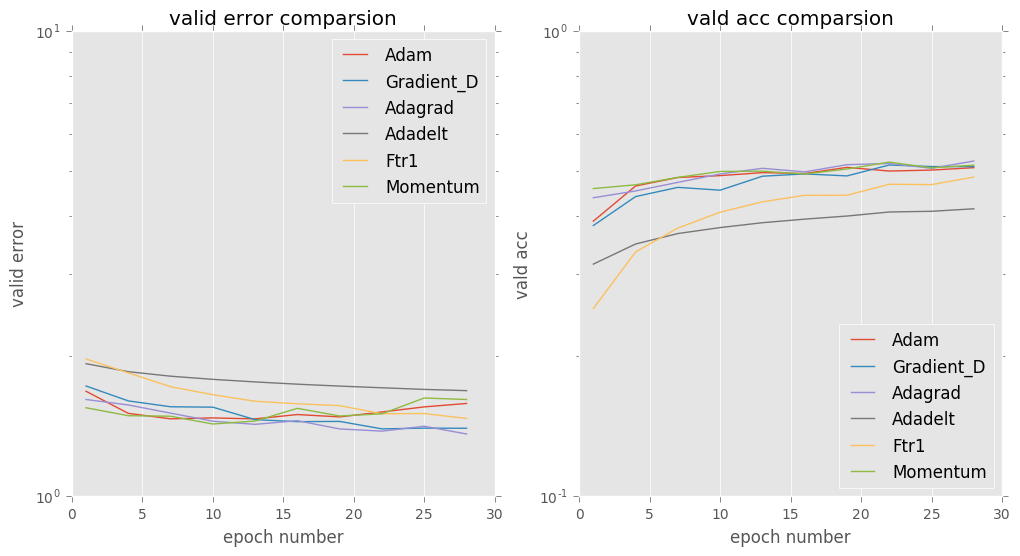

In [227]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12, 6))
ax3 = fig.add_subplot(1, 2, 1)
ax4 = fig.add_subplot(1, 2, 2)
ax3.plot(np.arange(1,31,3),elu3_vald_error, label='Adam')
ax3.plot(np.arange(1,31,3),elu3_GDP_vald_error, label='Gradient_D')
ax3.plot(np.arange(1,31,3),elu3_Agrad_vald_error, label='Adagrad')
ax3.plot(np.arange(1,31,3),elu3_ADD_vald_error, label='Adadelt')
ax3.plot(np.arange(1,31,3),elu3_Ftr1_vald_error, label='Ftr1')
ax3.plot(np.arange(1,31,3),elu3_Mom_vald_error, label='Momentum')
ax3.legend(loc='upper right')
ax3.set_xlabel('epoch number')
ax3.set_ylabel('valid error')
ax3.set_title('valid error comparsion')
ax3.set_yscale('log')
ax4.plot(np.arange(1,31,3),elu3_vald_acc, label='Adam')
ax4.plot(np.arange(1,31,3),elu3_GDP_vald_acc, label='Gradient_D')
ax4.plot(np.arange(1,31,3),elu3_Agrad_vald_acc, label='Adagrad')
ax4.plot(np.arange(1,31,3),elu3_ADD_vald_acc, label='Adadelt')
ax4.plot(np.arange(1,31,3),elu3_Ftr1_vald_acc, label='Ftr1')
ax4.plot(np.arange(1,31,3),elu3_Mom_vald_acc, label='Momentum')
ax4.legend(loc='lower right')
ax4.set_xlabel('epoch number')
ax4.set_ylabel('vald acc')
ax4.set_title('vald acc comparsion')
ax4.set_yscale('log')

# Batch Normalization

In [245]:
def fully_connected_layer_elu_with_norm(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    Wx_plus_b = tf.matmul(inputs, weights) + biases
    fc_mean, fc_var = tf.nn.moments(Wx_plus_b,axes=[0])
    scale = tf.Variable(tf.ones([output_dim]))
    shift = tf.Variable(tf.zeros([output_dim]))
    epsilon = 0.001
    ema = tf.train.ExponentialMovingAverage(decay=0.5)
    def mean_var_with_update():
        ema_apply_op = ema.apply([fc_mean, fc_var])
        with tf.control_dependencies([ema_apply_op]):
            return tf.identity(fc_mean), tf.identity(fc_var)
    mean, var = mean_var_with_update()

    Wx_plus_b = tf.nn.batch_normalization(Wx_plus_b, mean, var, shift, scale, epsilon)
    outputs = nonlinearity(Wx_plus_b)
    return outputs

In [246]:
# The best so far is 3 layers, 200 num_hidden, elu, Adagrad.
#elu with Adagrad Optimizer with fixed initilized learning rate =0.01num_hidden = 200
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_elu_with_norm(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_elu_with_norm(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_elu_with_norm(hidden_2, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))
with tf.name_scope('train'):
    train_step = tf.train.AdagradOptimizer(learning_rate=0.01).minimize(error)
init = tf.global_variables_initializer()
elu3_Norm_train_error, elu3_Norm_train_acc,elu3_Norm_vald_error,elu3_Norm_vald_acc = error_acc()

Completed time-0.15s End of epoch 03: err(train)=1.52 acc(train)=0.48
                 err(valid)=1.56 acc(valid)=0.46
Completed time-0.24s End of epoch 06: err(train)=1.39 acc(train)=0.53
                 err(valid)=1.49 acc(valid)=0.48
Completed time-0.15s End of epoch 09: err(train)=1.30 acc(train)=0.56
                 err(valid)=1.47 acc(valid)=0.49
Completed time-0.15s End of epoch 12: err(train)=1.22 acc(train)=0.58
                 err(valid)=1.47 acc(valid)=0.49
Completed time-0.15s End of epoch 15: err(train)=1.15 acc(train)=0.61
                 err(valid)=1.47 acc(valid)=0.49
Completed time-0.16s End of epoch 18: err(train)=1.10 acc(train)=0.63
                 err(valid)=1.47 acc(valid)=0.48
Completed time-0.16s End of epoch 21: err(train)=1.04 acc(train)=0.65
                 err(valid)=1.47 acc(valid)=0.50
Completed time-0.15s End of epoch 24: err(train)=0.99 acc(train)=0.67
                 err(valid)=1.50 acc(valid)=0.49
Completed time-0.15s End of epoch 27: err(train)

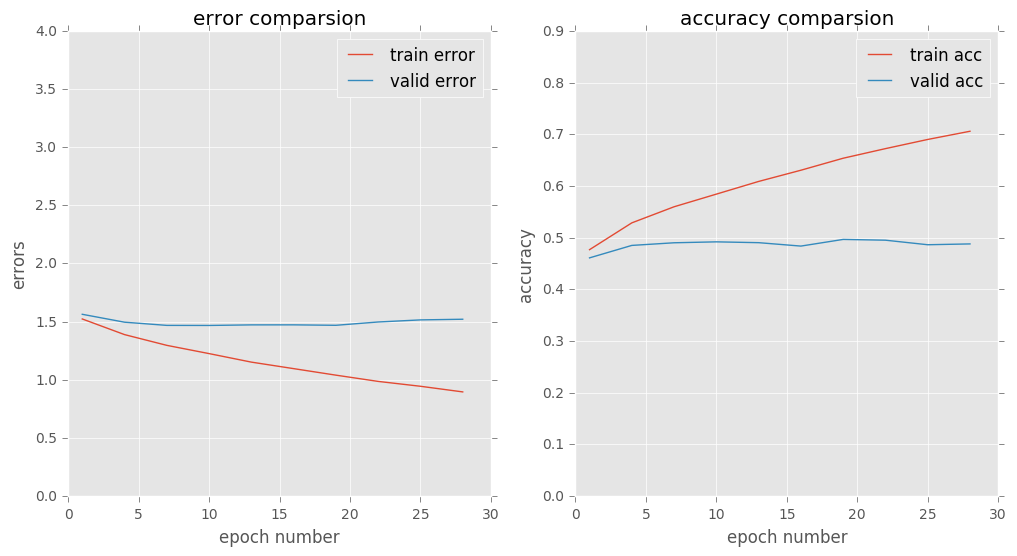

In [248]:
def graph_new(train_error, train_acc, vald_error, vald_acc):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.plot(np.arange(1,31,3),train_error, label='train error')
    ax1.plot(np.arange(1,31,3),vald_error, label='valid error')
    ax1.legend(loc='upper right')
    #ax1.set_yscale('log')
    ax1.set_xlabel('epoch number')
    ax1.set_ylabel('errors')
    ax1.set_ylim(0,4)
    ax1.set_title('error comparsion')
    ax2.plot(np.arange(1,31,3),train_acc, label='train acc')
    ax2.plot(np.arange(1,31,3),vald_acc, label='valid acc')
    ax2.legend(loc='upper right')
    #ax2.set_yscale('log')
    ax2.set_xlabel('epoch number')
    ax2.set_ylabel('accuracy')
    ax2.set_title('accuracy comparsion')
    ax2.set_yticks(np.arange(0,1,0.1))
_= graph_new(elu3_Norm_train_error, elu3_Norm_train_acc,elu3_Norm_vald_error,elu3_Norm_vald_acc)

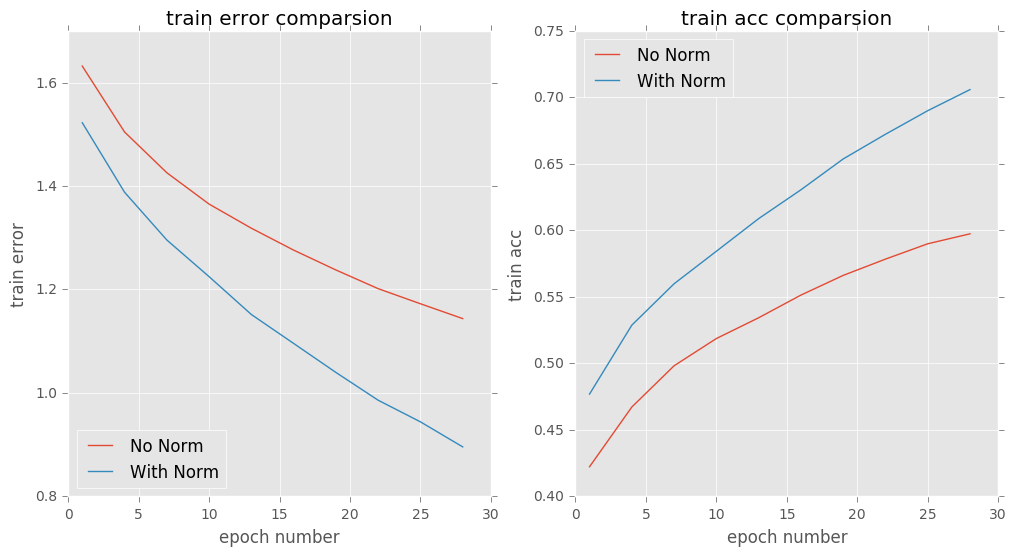

In [251]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12, 6))
ax3 = fig.add_subplot(1, 2, 1)
ax4 = fig.add_subplot(1, 2, 2)
ax3.plot(np.arange(1,31,3),elu3_Agrad_train_error, label='No Norm')
ax3.plot(np.arange(1,31,3),elu3_Norm_train_error, label='With Norm')
ax3.legend(loc='lower left')
ax3.set_xlabel('epoch number')
ax3.set_ylabel('train error')
ax3.set_title('train error comparsion')

ax4.plot(np.arange(1,31,3),elu3_Agrad_train_acc, label='No Norm')
ax4.plot(np.arange(1,31,3),elu3_Norm_train_acc, label='With Norm')
ax4.legend(loc='upper left')
ax4.set_xlabel('epoch number')
ax4.set_ylabel('train acc')
ax4.set_title('train acc comparsion')

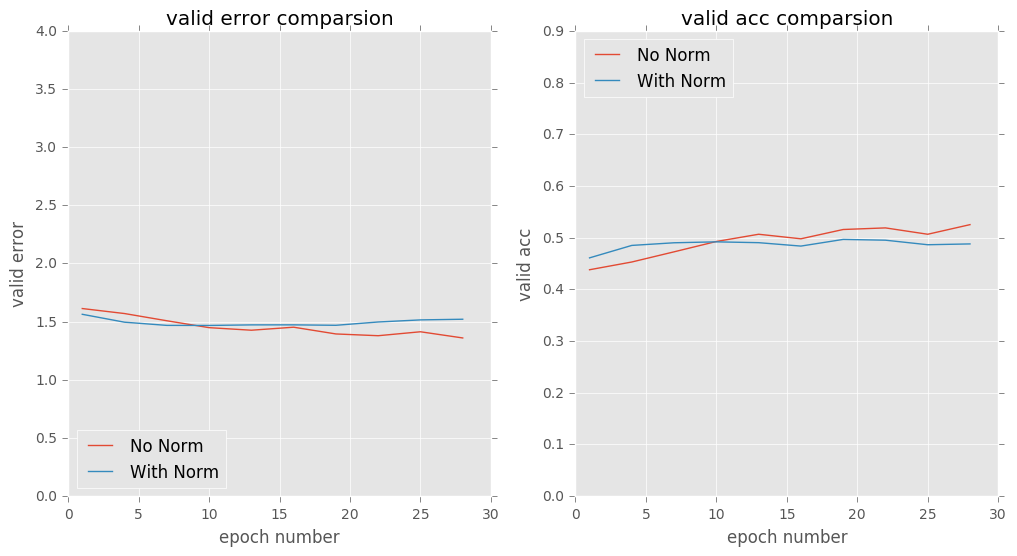

In [255]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12, 6))
ax3 = fig.add_subplot(1, 2, 1)
ax4 = fig.add_subplot(1, 2, 2)
ax3.plot(np.arange(1,31,3),elu3_Agrad_vald_error, label='No Norm')
ax3.plot(np.arange(1,31,3),elu3_Norm_vald_error, label='With Norm')
ax3.legend(loc='lower left')
ax3.set_xlabel('epoch number')
ax3.set_ylabel('valid error')
ax3.set_title('valid error comparsion')
#ax3.set_yscale('log')
ax3.set_ylim(0,4)

ax4.plot(np.arange(1,31,3),elu3_Agrad_vald_acc, label='No Norm')
ax4.plot(np.arange(1,31,3),elu3_Norm_vald_acc, label='With Norm')
ax4.legend(loc='upper left')
ax4.set_xlabel('epoch number')
ax4.set_ylabel('valid acc')
ax4.set_title('valid acc comparsion')
#ax4.set_yscale('log')
ax4.set_yticks(np.arange(0,1,0.1))


# Dropout

In [241]:
def fully_connected_layer_elu_with_norm_dropout(inputs, input_dim, output_dim, nonlinearity=tf.nn.elu):
    weights = tf.Variable(
        tf.truncated_normal(
            [input_dim, output_dim], stddev=2. / (input_dim + output_dim)**0.5), 
        'weights')
    biases = tf.Variable(tf.zeros([output_dim]), 'biases')
    Wx_plus_b = tf.matmul(inputs, weights) + biases
    Wx_plus_b = tf.nn.dropout(Wx_plus_b, keep_prob=0.7)
    outputs = nonlinearity(Wx_plus_b)
    return outputs

In [260]:
inputs = tf.placeholder(tf.float32, [None, train_data.inputs.shape[1]], 'inputs')
targets = tf.placeholder(tf.float32, [None, train_data.num_classes], 'targets')
num_hidden = 200
with tf.name_scope('fc-layer-1'):
    hidden_1 = fully_connected_layer_elu_with_norm_dropout(inputs, train_data.inputs.shape[1], num_hidden)
with tf.name_scope('fc-layer-2'):
    hidden_2 = fully_connected_layer_elu_with_norm_dropout(hidden_1, num_hidden, num_hidden)
with tf.name_scope('output-layer'):
    outputs = fully_connected_layer_elu_with_norm_dropout(hidden_2, num_hidden, train_data.num_classes, tf.identity)
with tf.name_scope('error'):
    error = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(outputs, targets))
with tf.name_scope('accuracy'):
    accuracy = tf.reduce_mean(tf.cast(
            tf.equal(tf.argmax(outputs, 1), tf.argmax(targets, 1)), 
            tf.float32))
with tf.name_scope('train'):
    train_step = tf.train.AdagradOptimizer(learning_rate=0.01).minimize(error)
init = tf.global_variables_initializer()
elu3_Norm_d_train_error, elu3_Norm_d_train_acc,elu3_Norm_d_vald_error,elu3_Norm_d_vald_acc = error_acc()

Completed time-0.14s End of epoch 03: err(train)=2.01 acc(train)=0.29
                 err(valid)=1.99 acc(valid)=0.29
Completed time-0.15s End of epoch 06: err(train)=1.92 acc(train)=0.32
                 err(valid)=1.91 acc(valid)=0.33
Completed time-0.15s End of epoch 09: err(train)=1.86 acc(train)=0.34
                 err(valid)=1.86 acc(valid)=0.35
Completed time-0.15s End of epoch 12: err(train)=1.82 acc(train)=0.36
                 err(valid)=1.84 acc(valid)=0.35
Completed time-0.15s End of epoch 15: err(train)=1.80 acc(train)=0.36
                 err(valid)=1.82 acc(valid)=0.35
Completed time-0.15s End of epoch 18: err(train)=1.77 acc(train)=0.37
                 err(valid)=1.81 acc(valid)=0.36
Completed time-0.26s End of epoch 21: err(train)=1.75 acc(train)=0.38
                 err(valid)=1.81 acc(valid)=0.36
Completed time-0.16s End of epoch 24: err(train)=1.73 acc(train)=0.38
                 err(valid)=1.79 acc(valid)=0.36
Completed time-0.16s End of epoch 27: err(train)

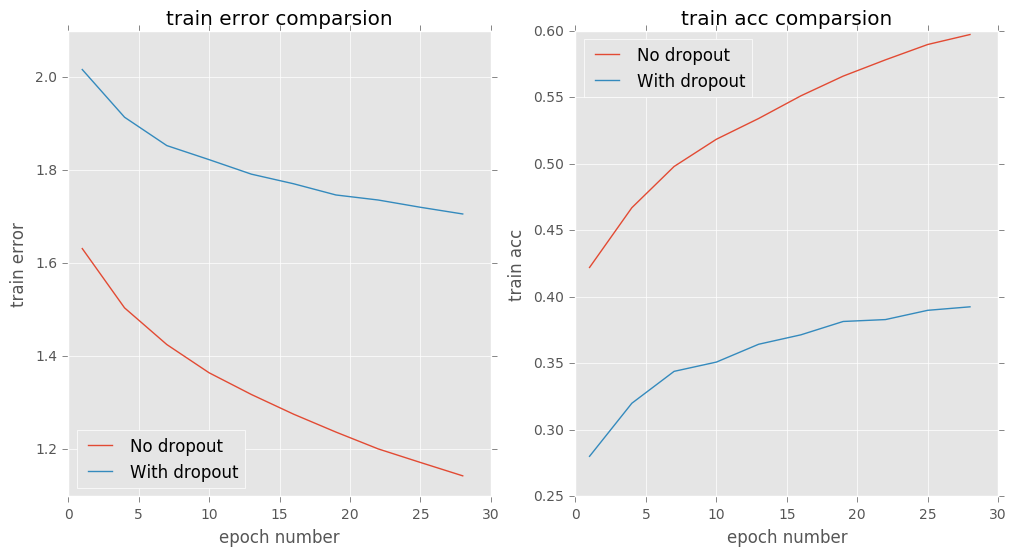

In [258]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12, 6))
ax3 = fig.add_subplot(1, 2, 1)
ax4 = fig.add_subplot(1, 2, 2)
ax3.plot(np.arange(1,31,3),elu3_Agrad_train_error, label='No dropout')
ax3.plot(np.arange(1,31,3),elu3_Norm_d_train_error, label='With dropout')
ax3.legend(loc='lower left')
ax3.set_xlabel('epoch number')
ax3.set_ylabel('train error')
ax3.set_title('train error comparsion')

ax4.plot(np.arange(1,31,3),elu3_Agrad_train_acc, label='No dropout')
ax4.plot(np.arange(1,31,3),elu3_Norm_d_train_acc, label='With dropout')
ax4.legend(loc='upper left')
ax4.set_xlabel('epoch number')
ax4.set_ylabel('train acc')
ax4.set_title('train acc comparsion')

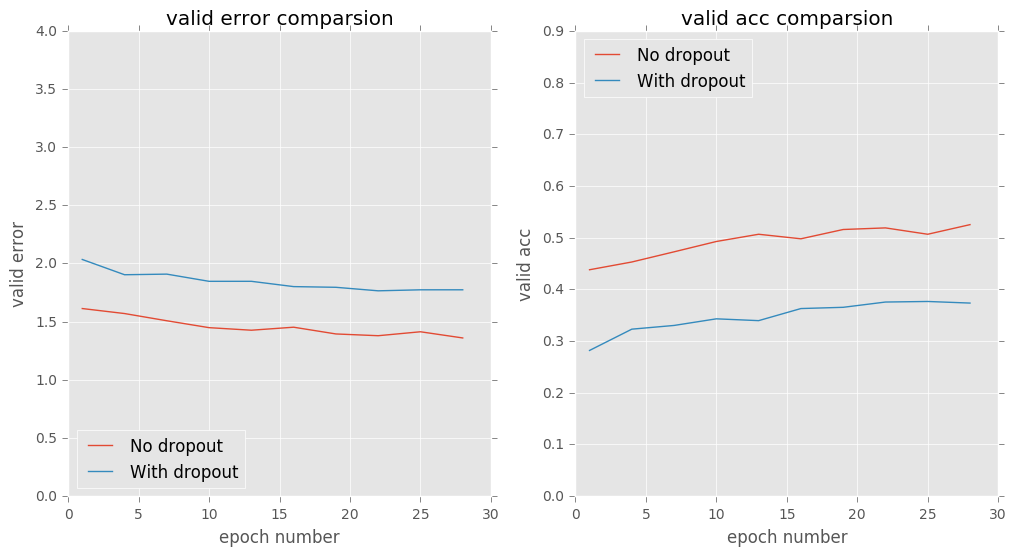

In [259]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12, 6))
ax3 = fig.add_subplot(1, 2, 1)
ax4 = fig.add_subplot(1, 2, 2)
ax3.plot(np.arange(1,31,3),elu3_Agrad_vald_error, label='No dropout')
ax3.plot(np.arange(1,31,3),elu3_Norm_d_vald_error, label='With dropout')
ax3.legend(loc='lower left')
ax3.set_xlabel('epoch number')
ax3.set_ylabel('valid error')
ax3.set_title('valid error comparsion')
#ax3.set_yscale('log')
ax3.set_ylim(0,4)

ax4.plot(np.arange(1,31,3),elu3_Agrad_vald_acc, label='No dropout')
ax4.plot(np.arange(1,31,3),elu3_Norm_d_vald_acc, label='With dropout')
ax4.legend(loc='upper left')
ax4.set_xlabel('epoch number')
ax4.set_ylabel('valid acc')
ax4.set_title('valid acc comparsion')
#ax4.set_yscale('log')
ax4.set_yticks(np.arange(0,1,0.1))
